# 2. Supervised Learning

#### 지도학습 종류
- 분류: 클래스 분류
- 회귀: 실수값 예측

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

#### Forge Dataset 을 활용한 분류 (인위적으로 생성한 데이터)

In [2]:
X, y = mglearn.datasets.make_forge()
print(X.shape)
print(y.shape)

(26, 2)
(26,)


X.shape: (26, 2)


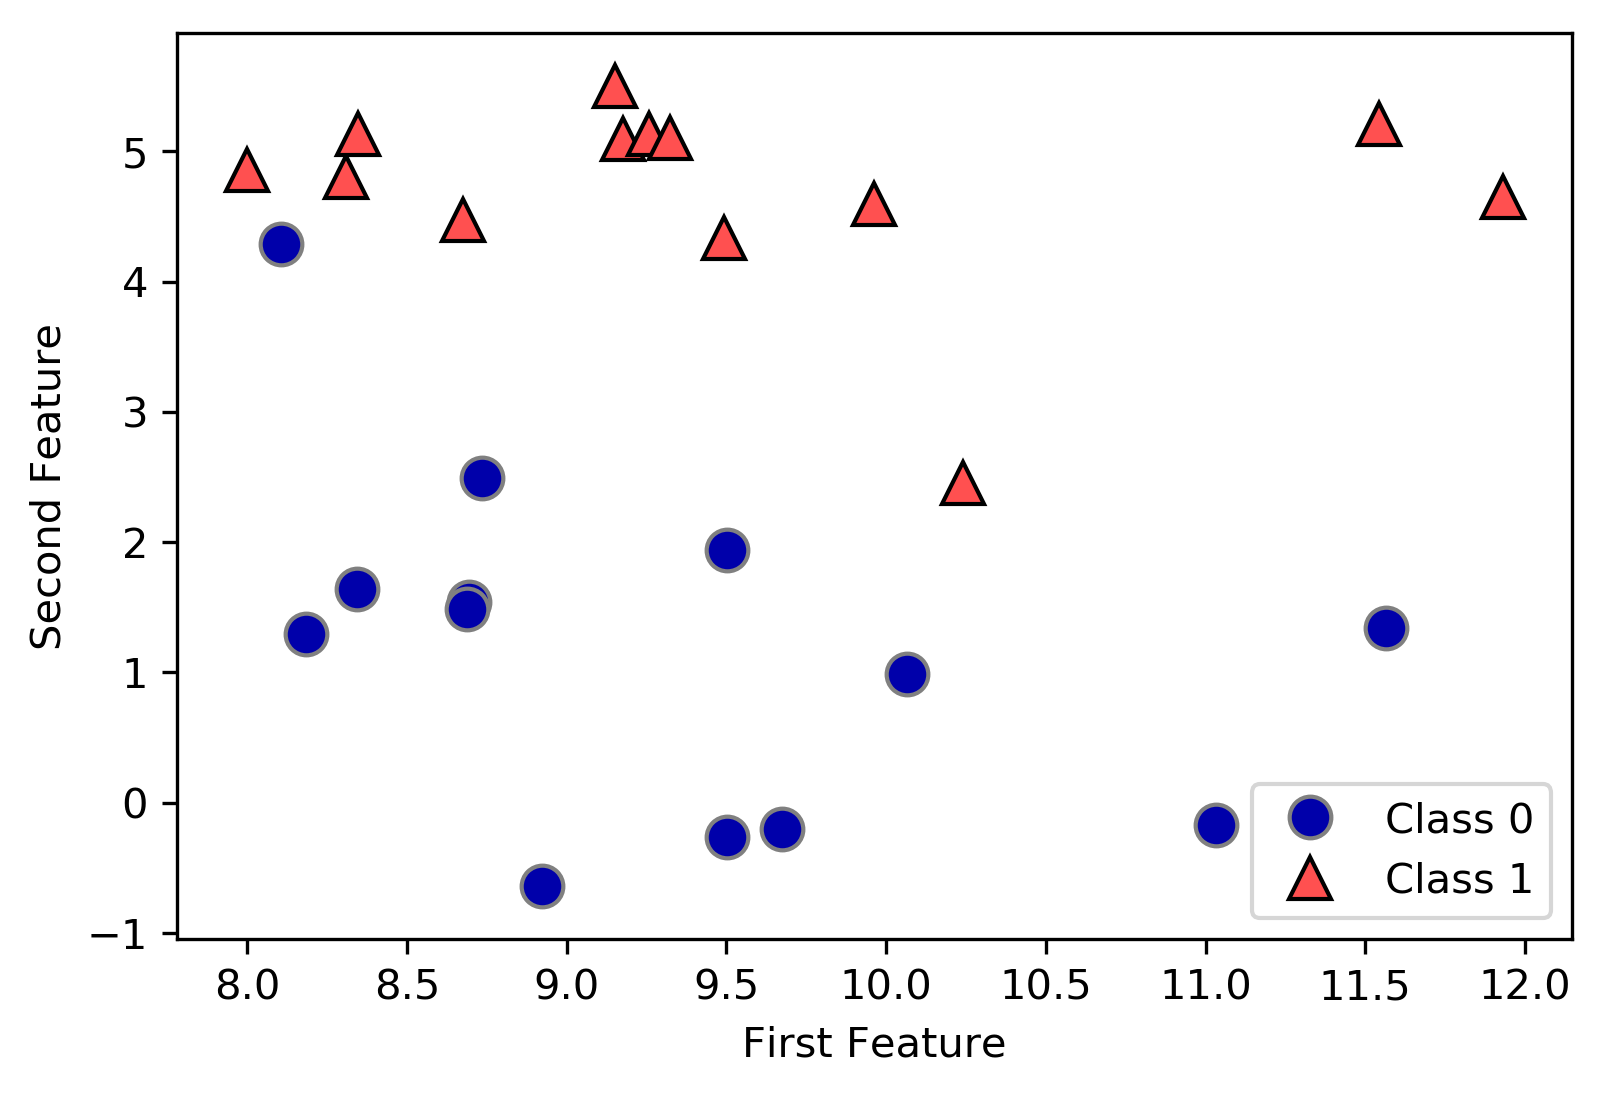

In [3]:
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

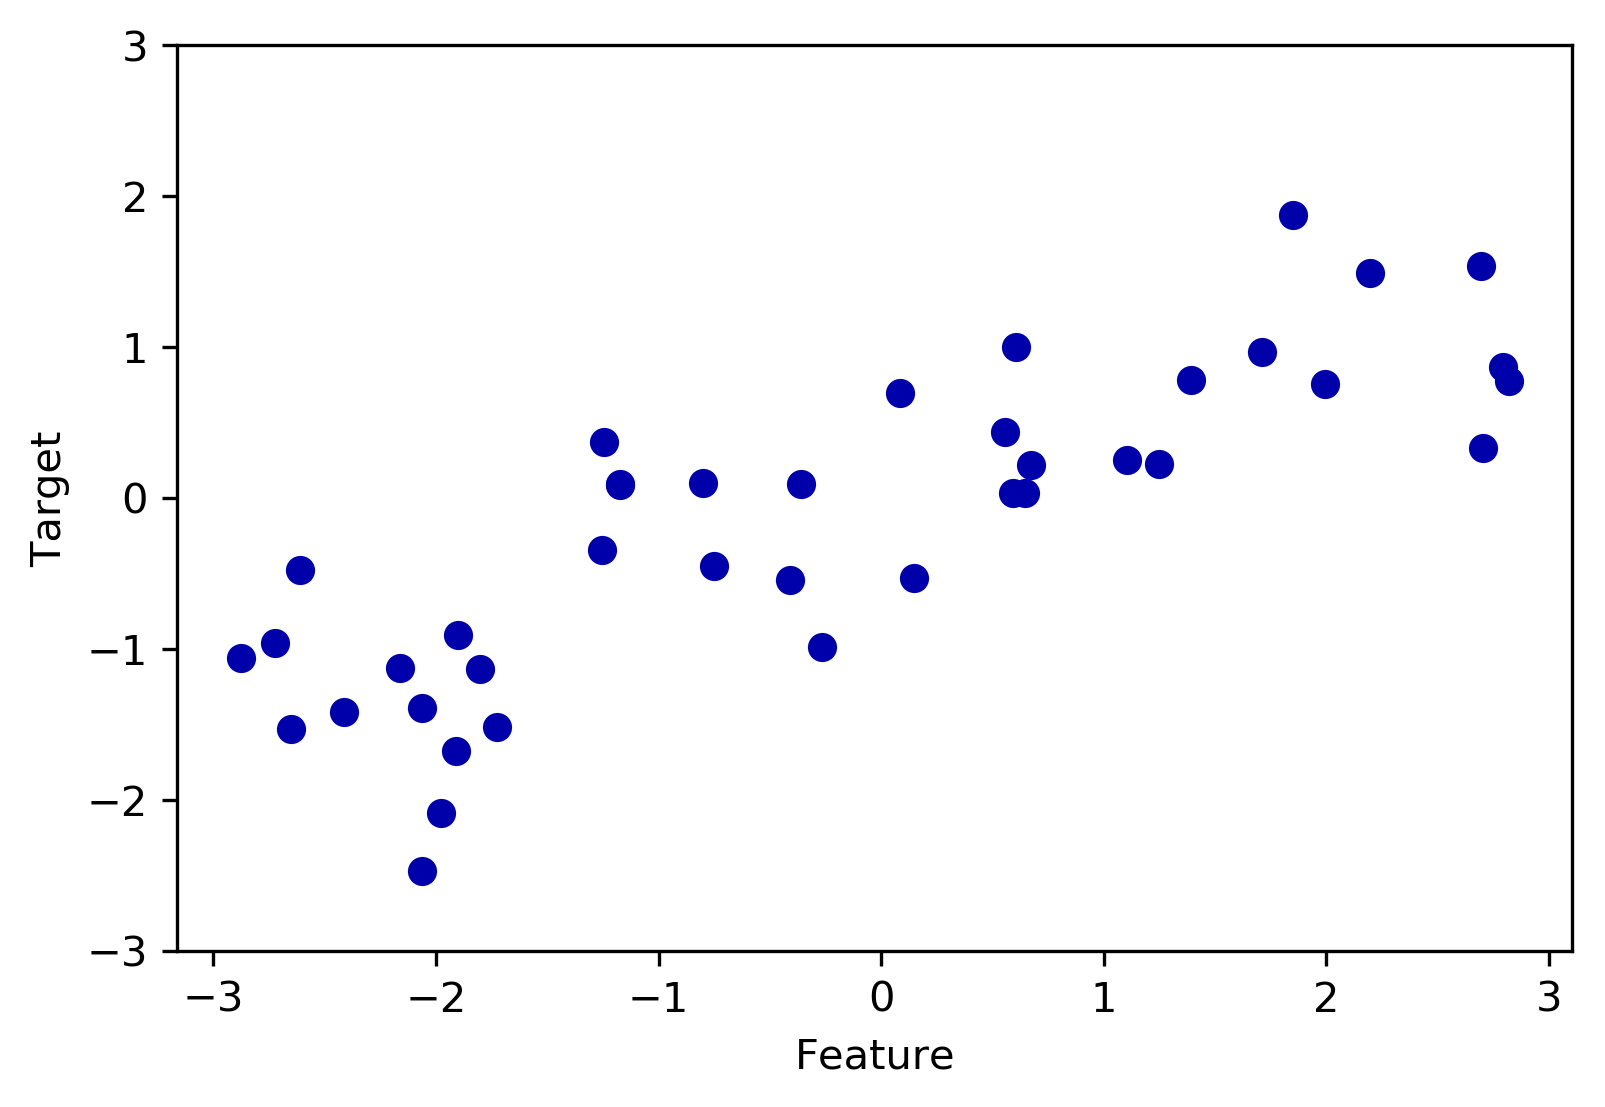

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

#### 위스콘신 유방함 데이터셋

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print("유방암의 데이터의 형태: {}".format(cancer.data.shape))
print(cancer.target.shape)
print(cancer.data[0])
print(cancer.target[0])
print(cancer.target_names[0])

유방암의 데이터의 형태: (569, 30)
(569,)
[   17.99     10.38    122.8    1001.        0.118     0.278     0.3
     0.147     0.242     0.079     1.095     0.905     8.589   153.4
     0.006     0.049     0.054     0.016     0.03      0.006    25.38
    17.33    184.6    2019.        0.162     0.666     0.712     0.265
     0.46      0.119]
0
malignant


In [7]:
print("클래스별 샘플 개수: \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수: 
{'malignant': 212, 'benign': 357}


In [8]:
print("특성 이름: \n{}".format(cancer.feature_names))

특성 이름: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 범죄율과 고속도로 접근성
- 특성공학: 기존에 존재하는 특성들을 변형시켜 분석

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))
print(boston.keys())
print(boston.feature_names)

데이터의 형태: (506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


- 기존의 13개에서 2개씩 중복을 포함해 짝지은 91개의 특성을 더해 104개의 특성을 생성

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


#### 2.3.2 k-최근접 이웃

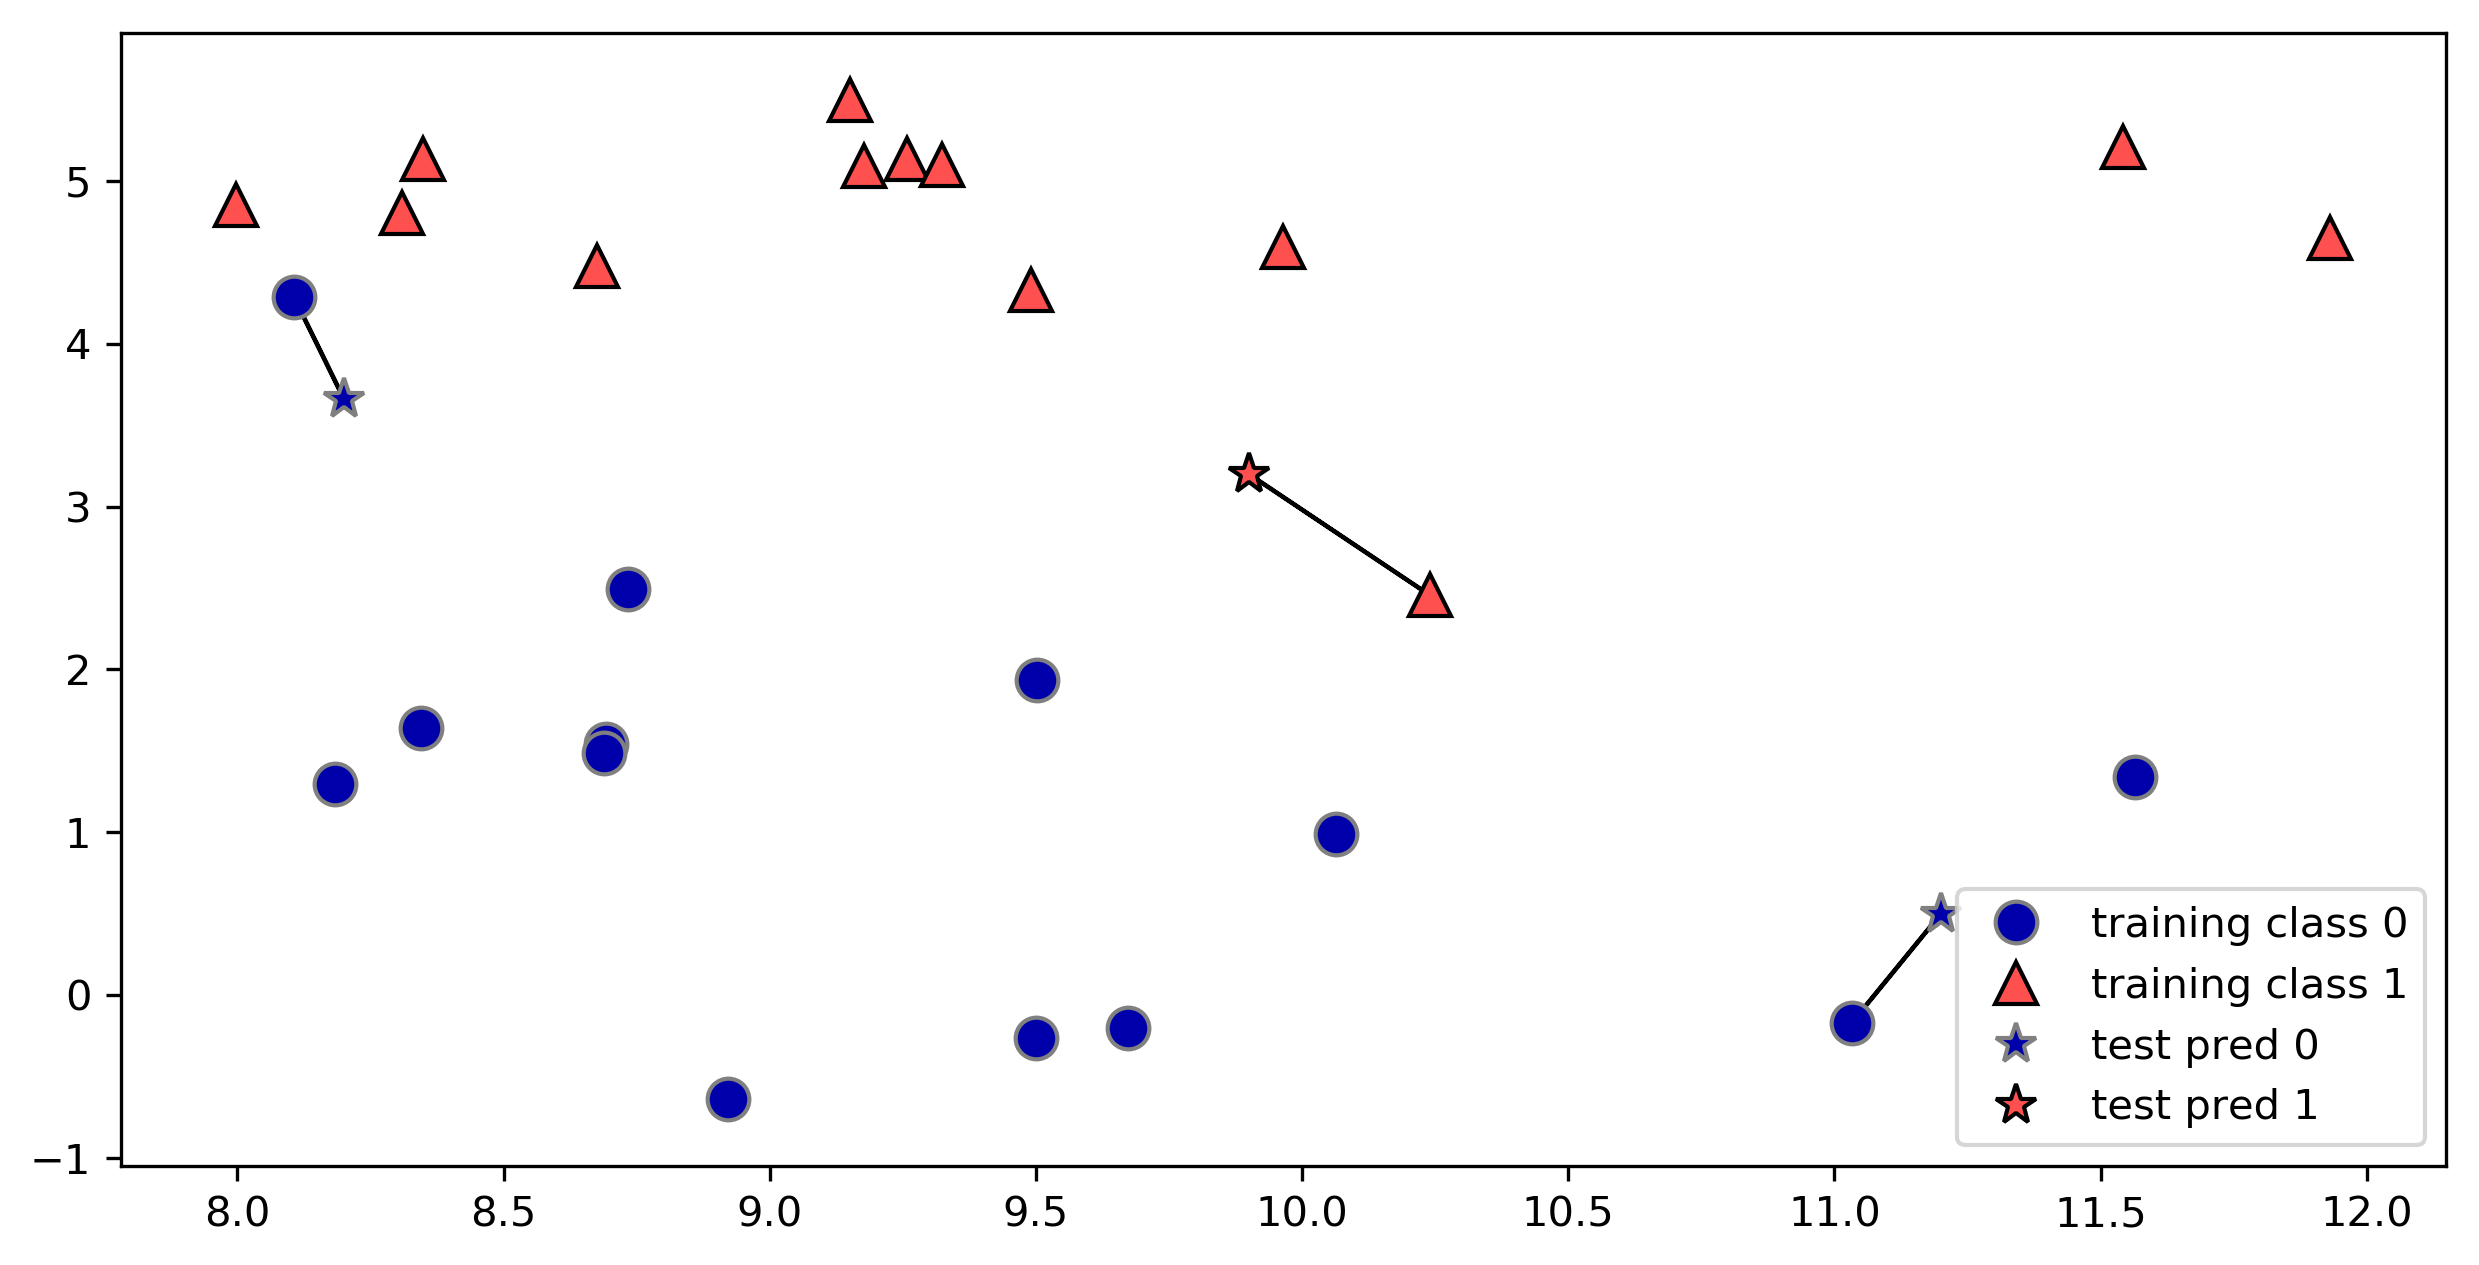

In [11]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=1)

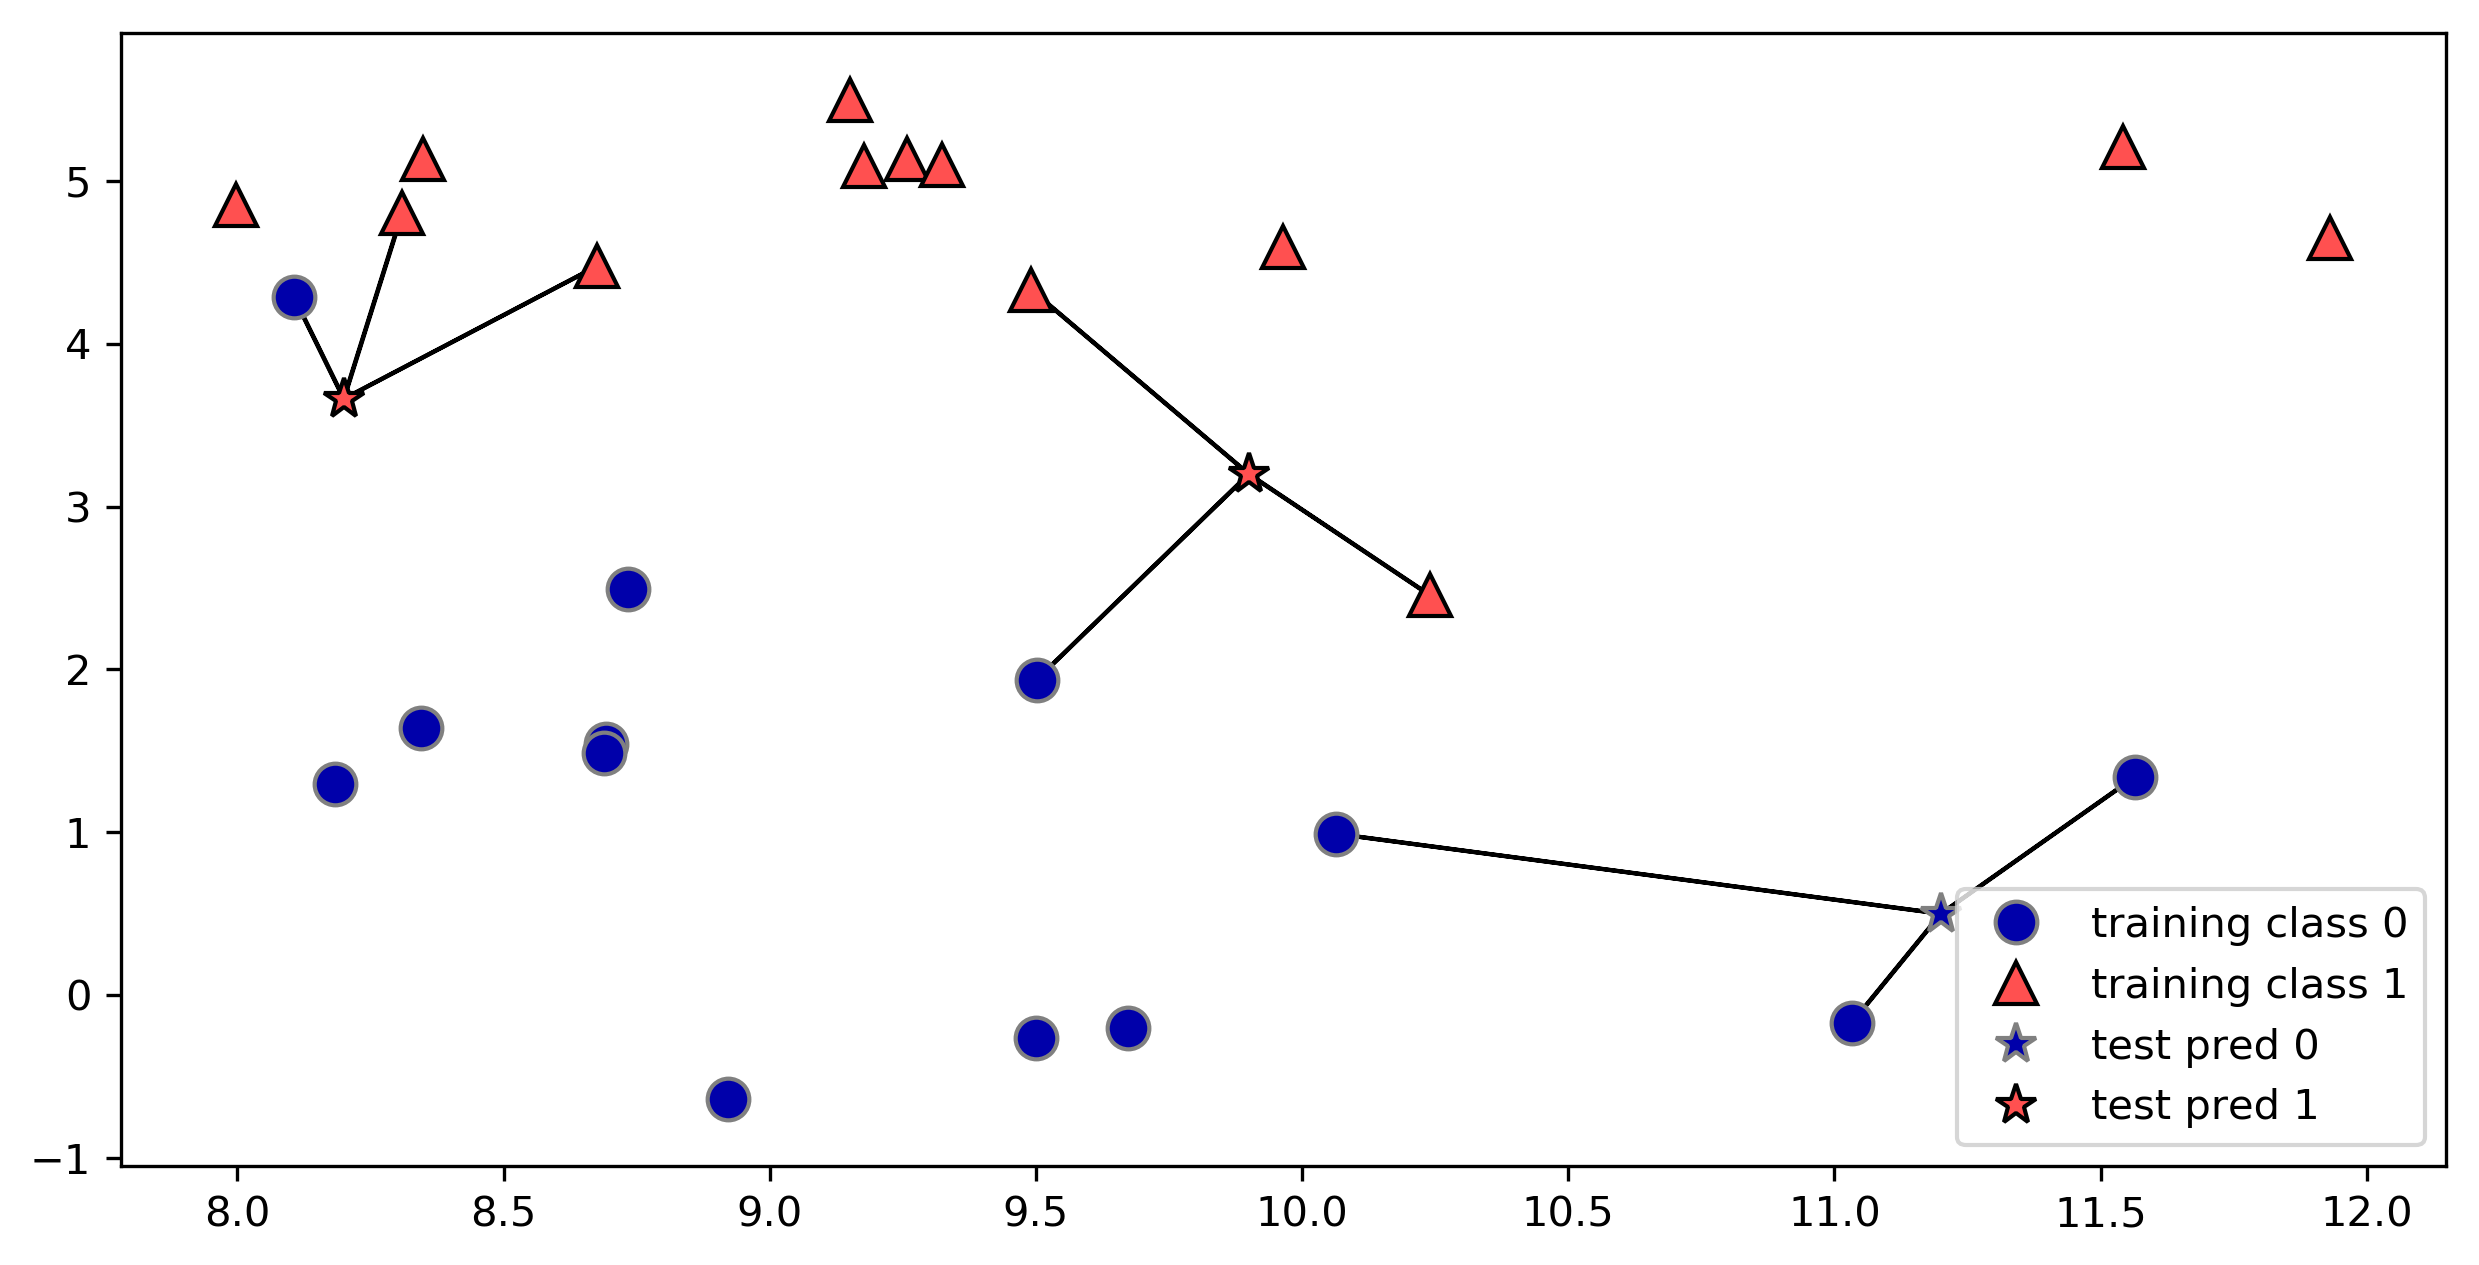

In [12]:
plt.figure(figsize=(10, 5))
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)

(19, 2)
(7, 2)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [16]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


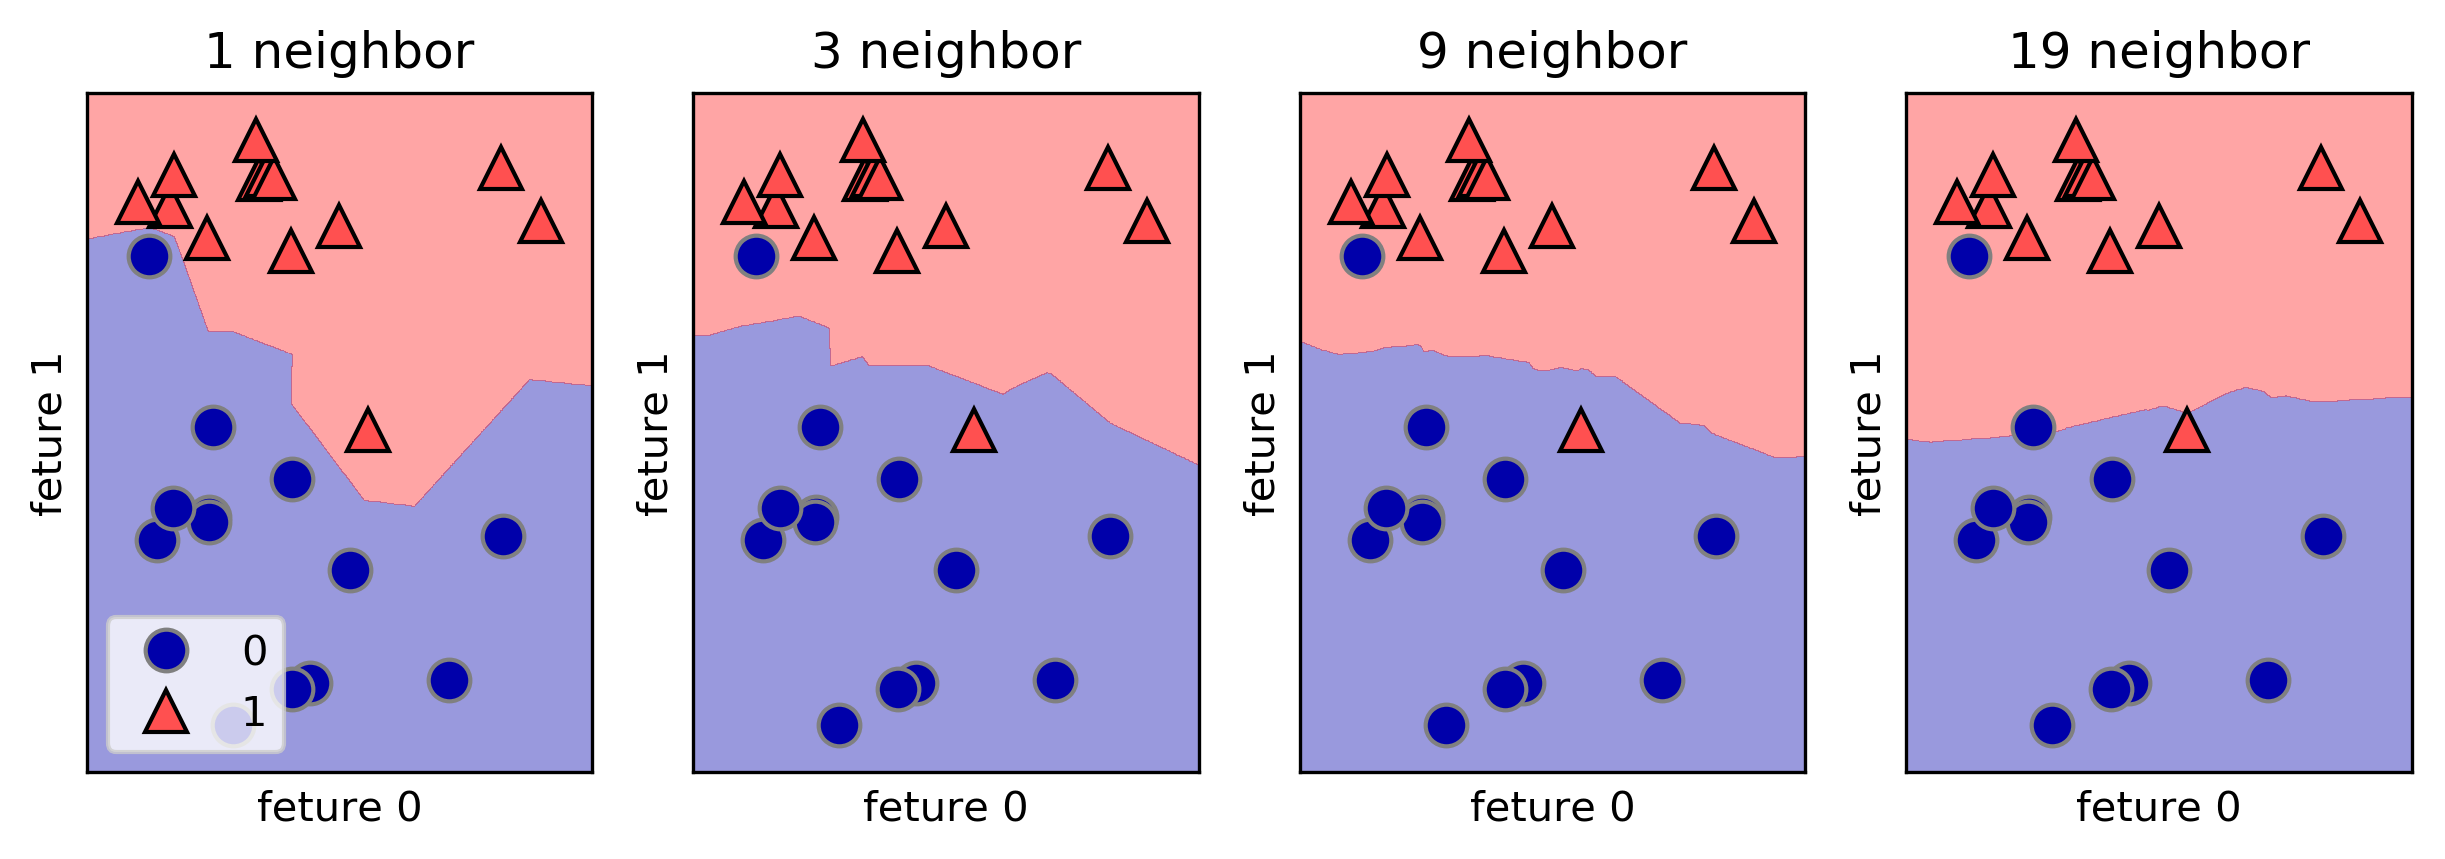

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9, 19], axes):
    #fit 메서드는 self 객체를 반환
    #그래서 객체 생성과 fit 메서드를 한 줄 쓸수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feture 0")
    ax.set_ylabel("feture 1")
axes[0].legend(loc=3)    

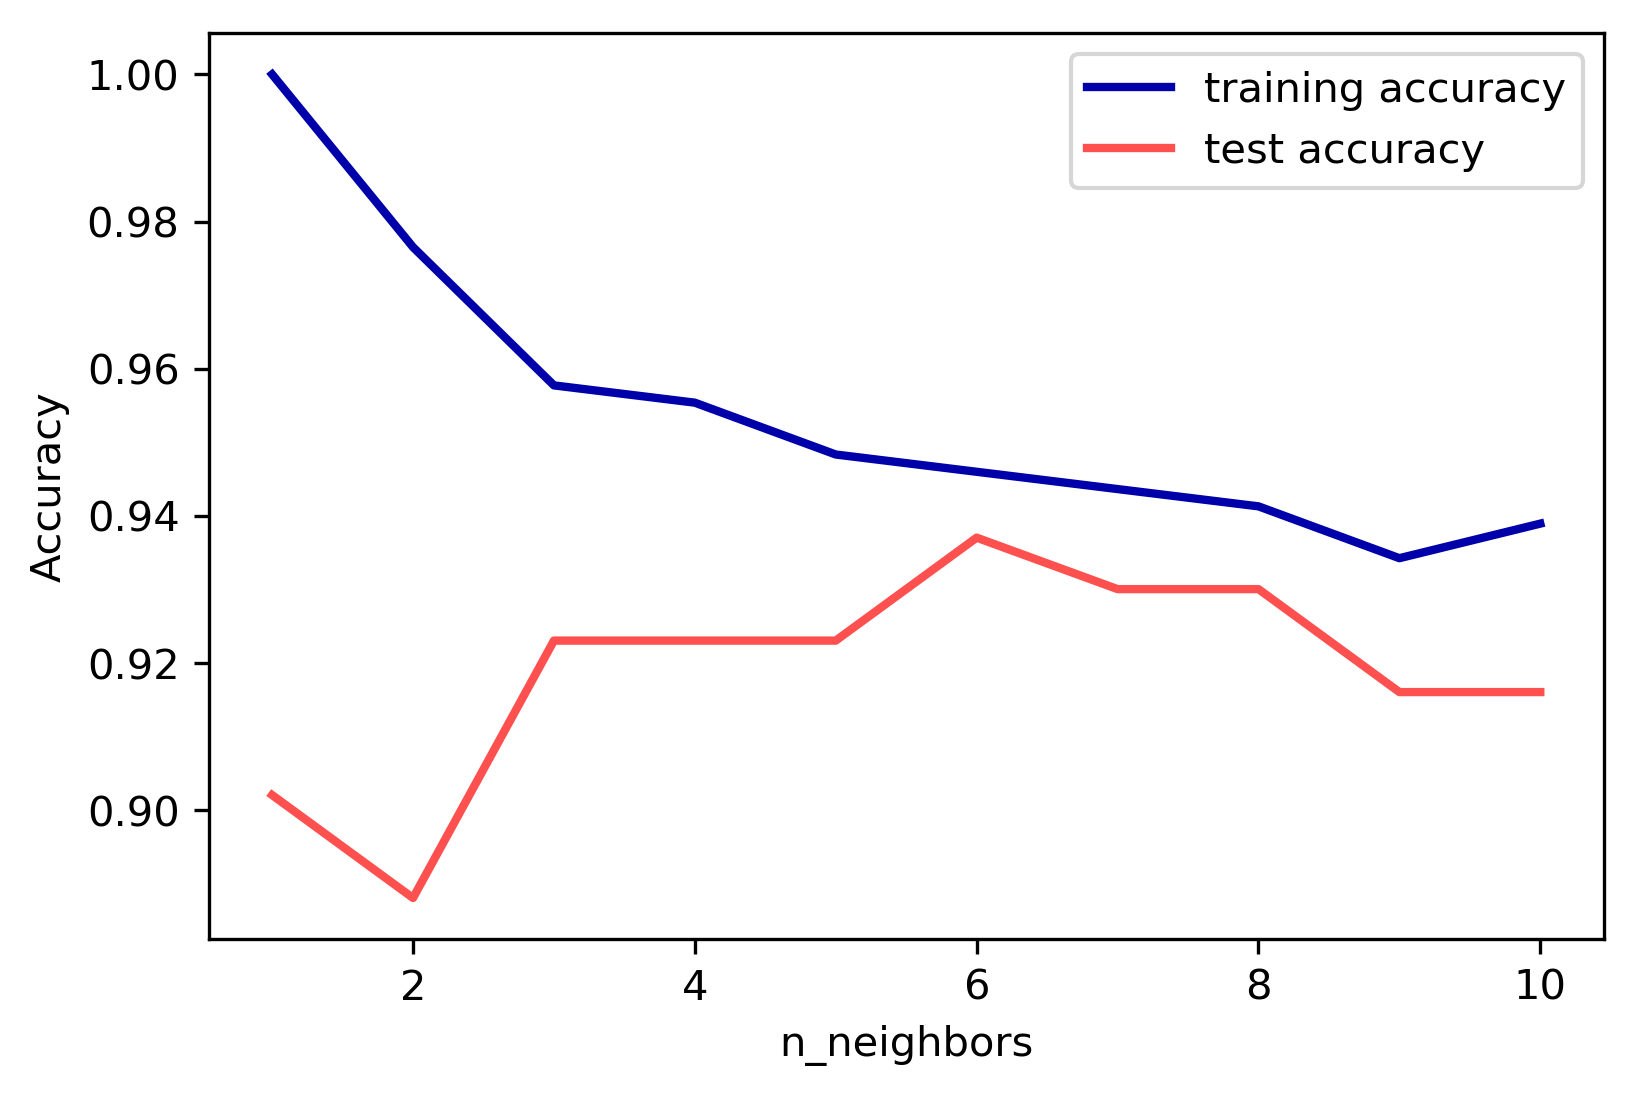

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
                                    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-최근접 이웃 회귀

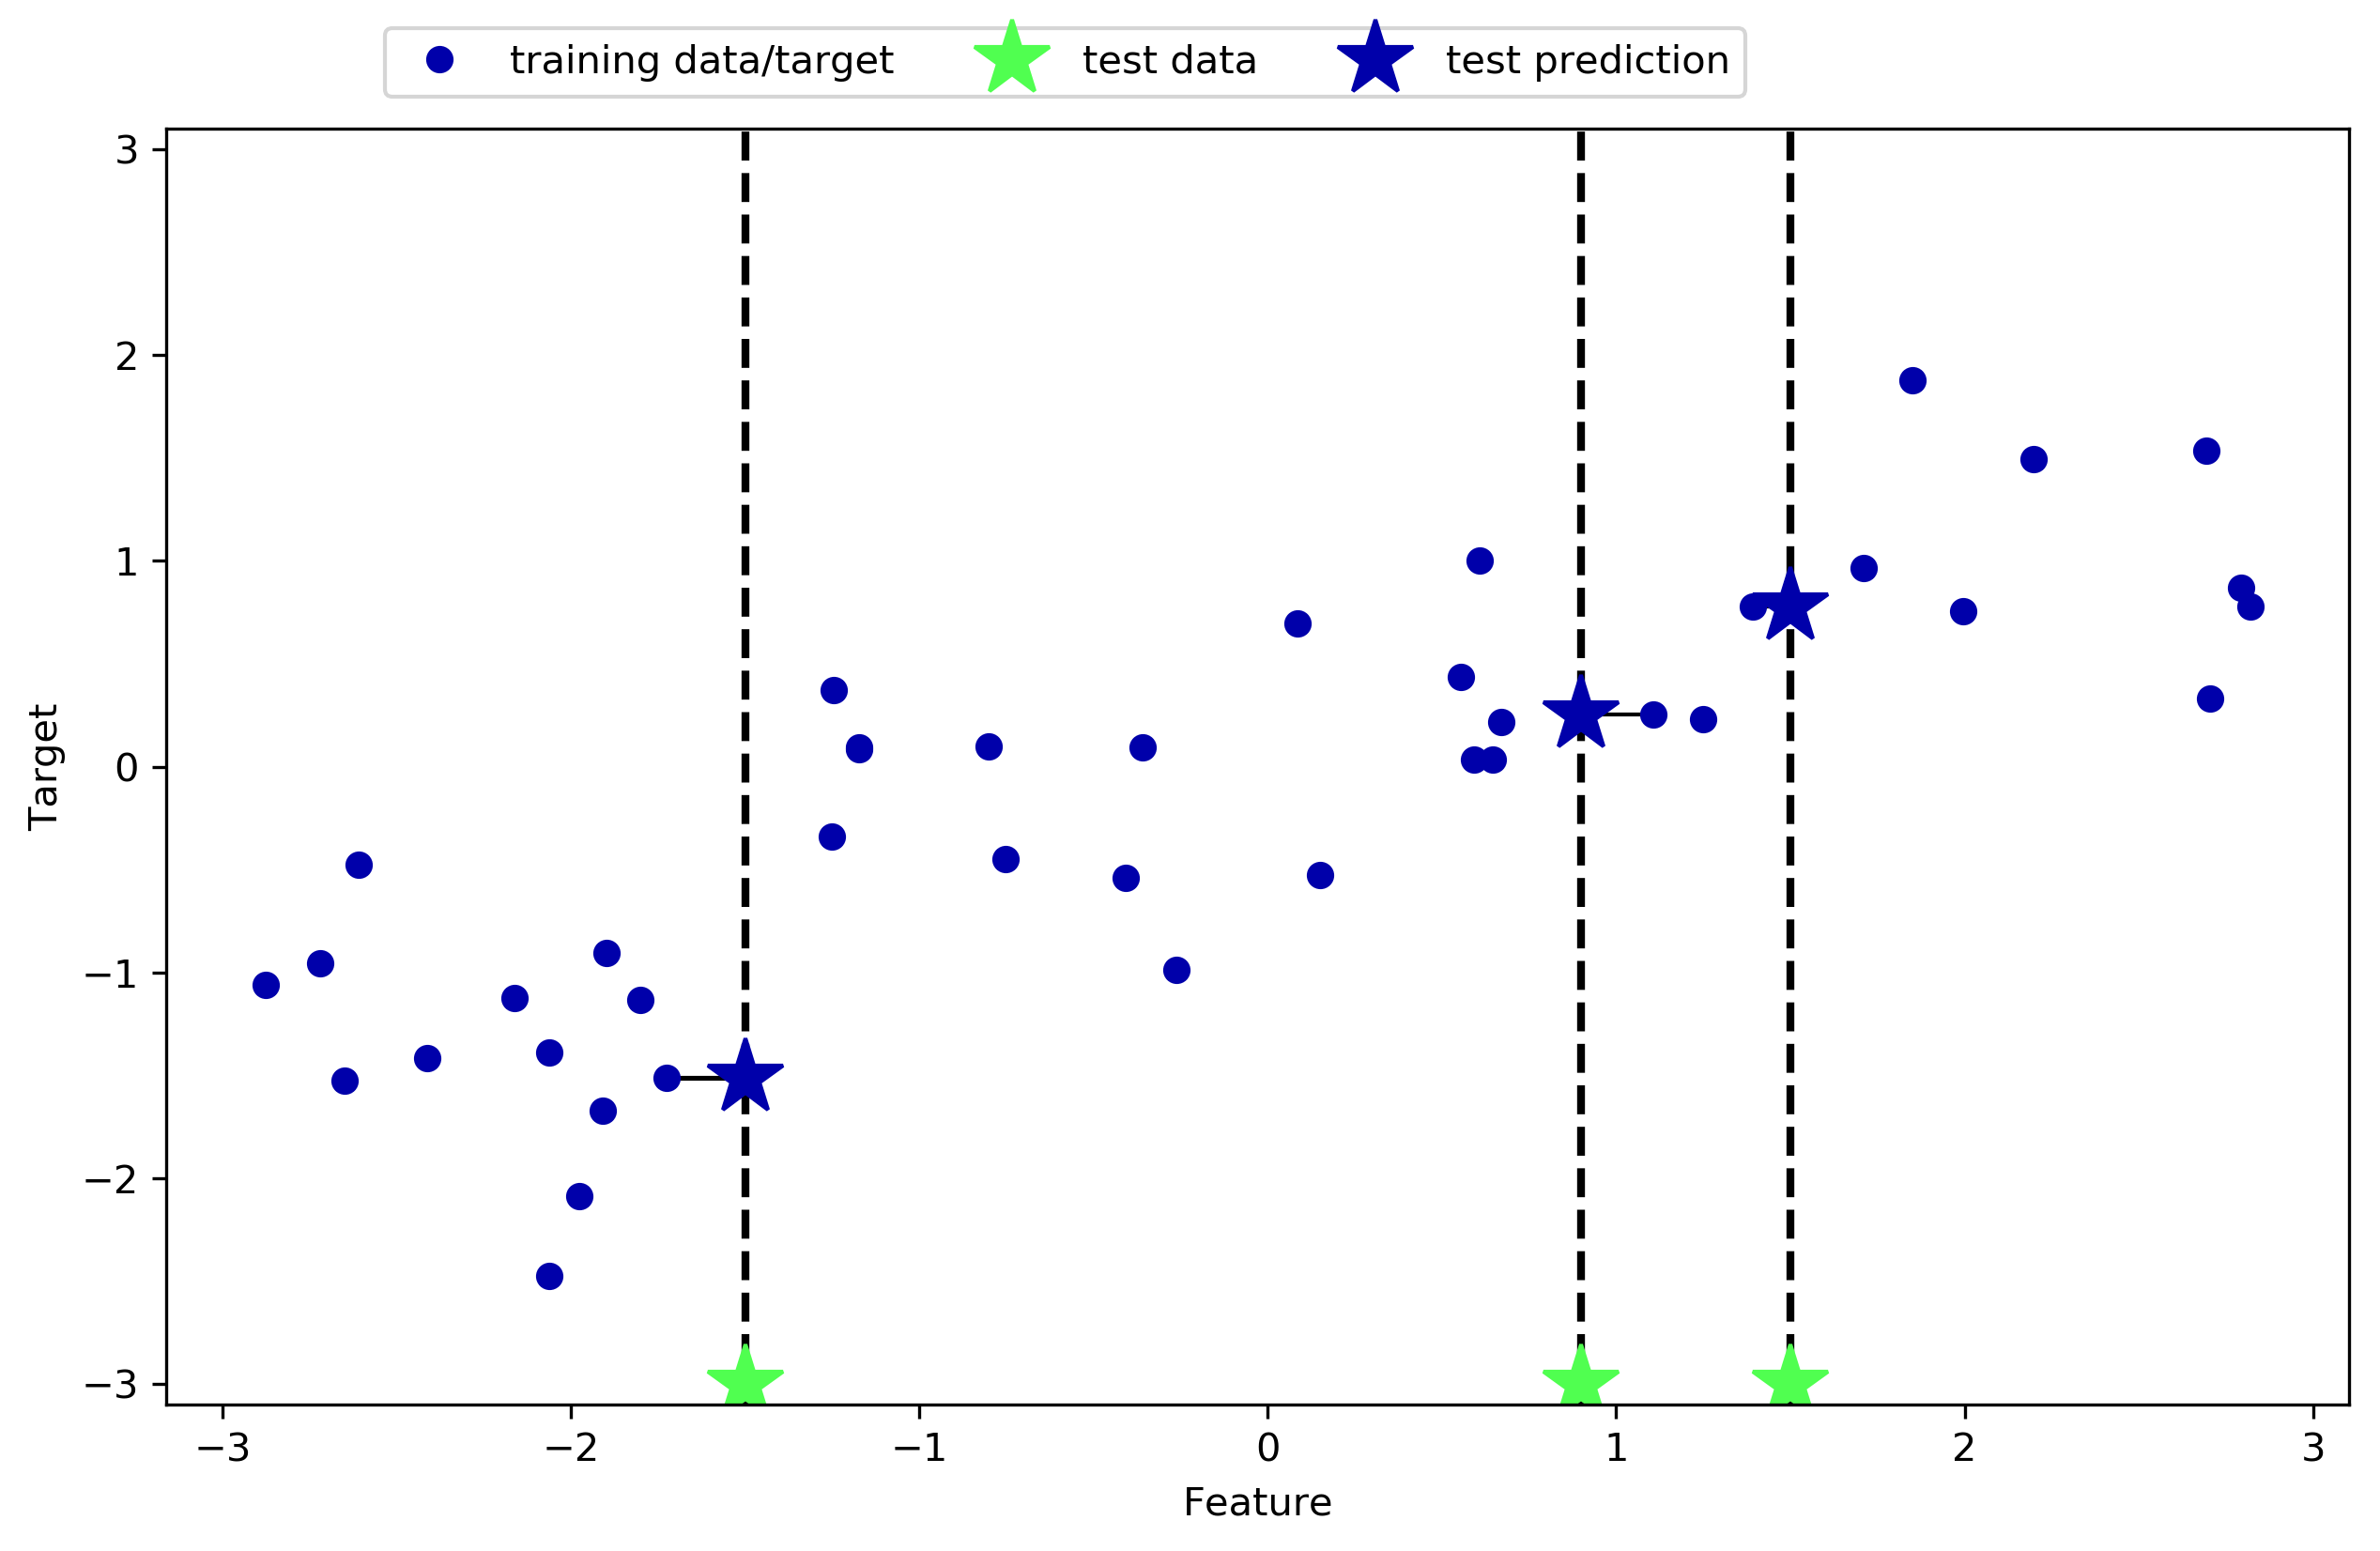

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3, metric='minkowski', p=2, weights='uniform')
#reg = KNeighborsRegressor(n_neighbors=3, metric='minkowski', p=2, weights='distance')

reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("테스트 세트 예측: \n{}".format(reg.predict(X_test)))

테스트 세트 예측: 
[-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [23]:
print("테스트 세트 예측 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측 R^2: 0.83


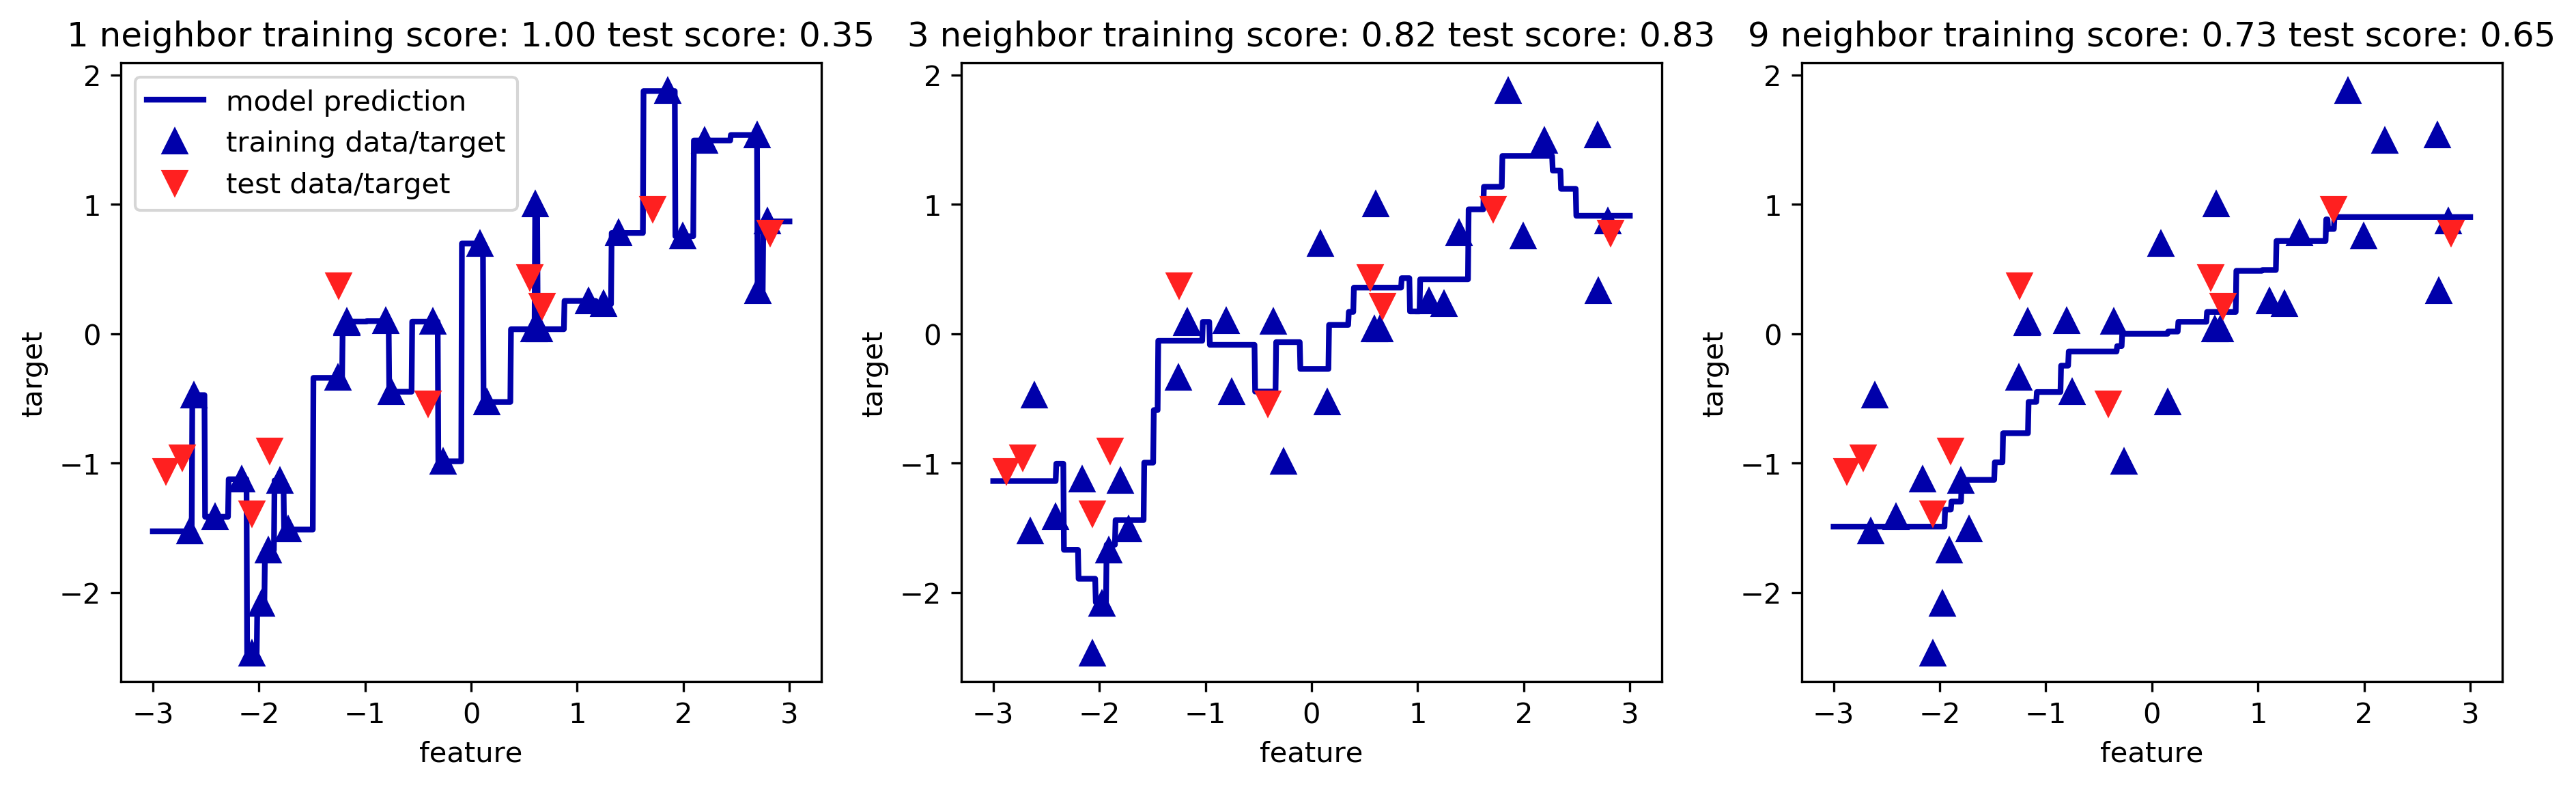

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor training score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model prediction", "training data/target", "test data/target"], loc="best")

#### 2.3.3. 선형 모델

w[0]: 0.393906  b: -0.031804


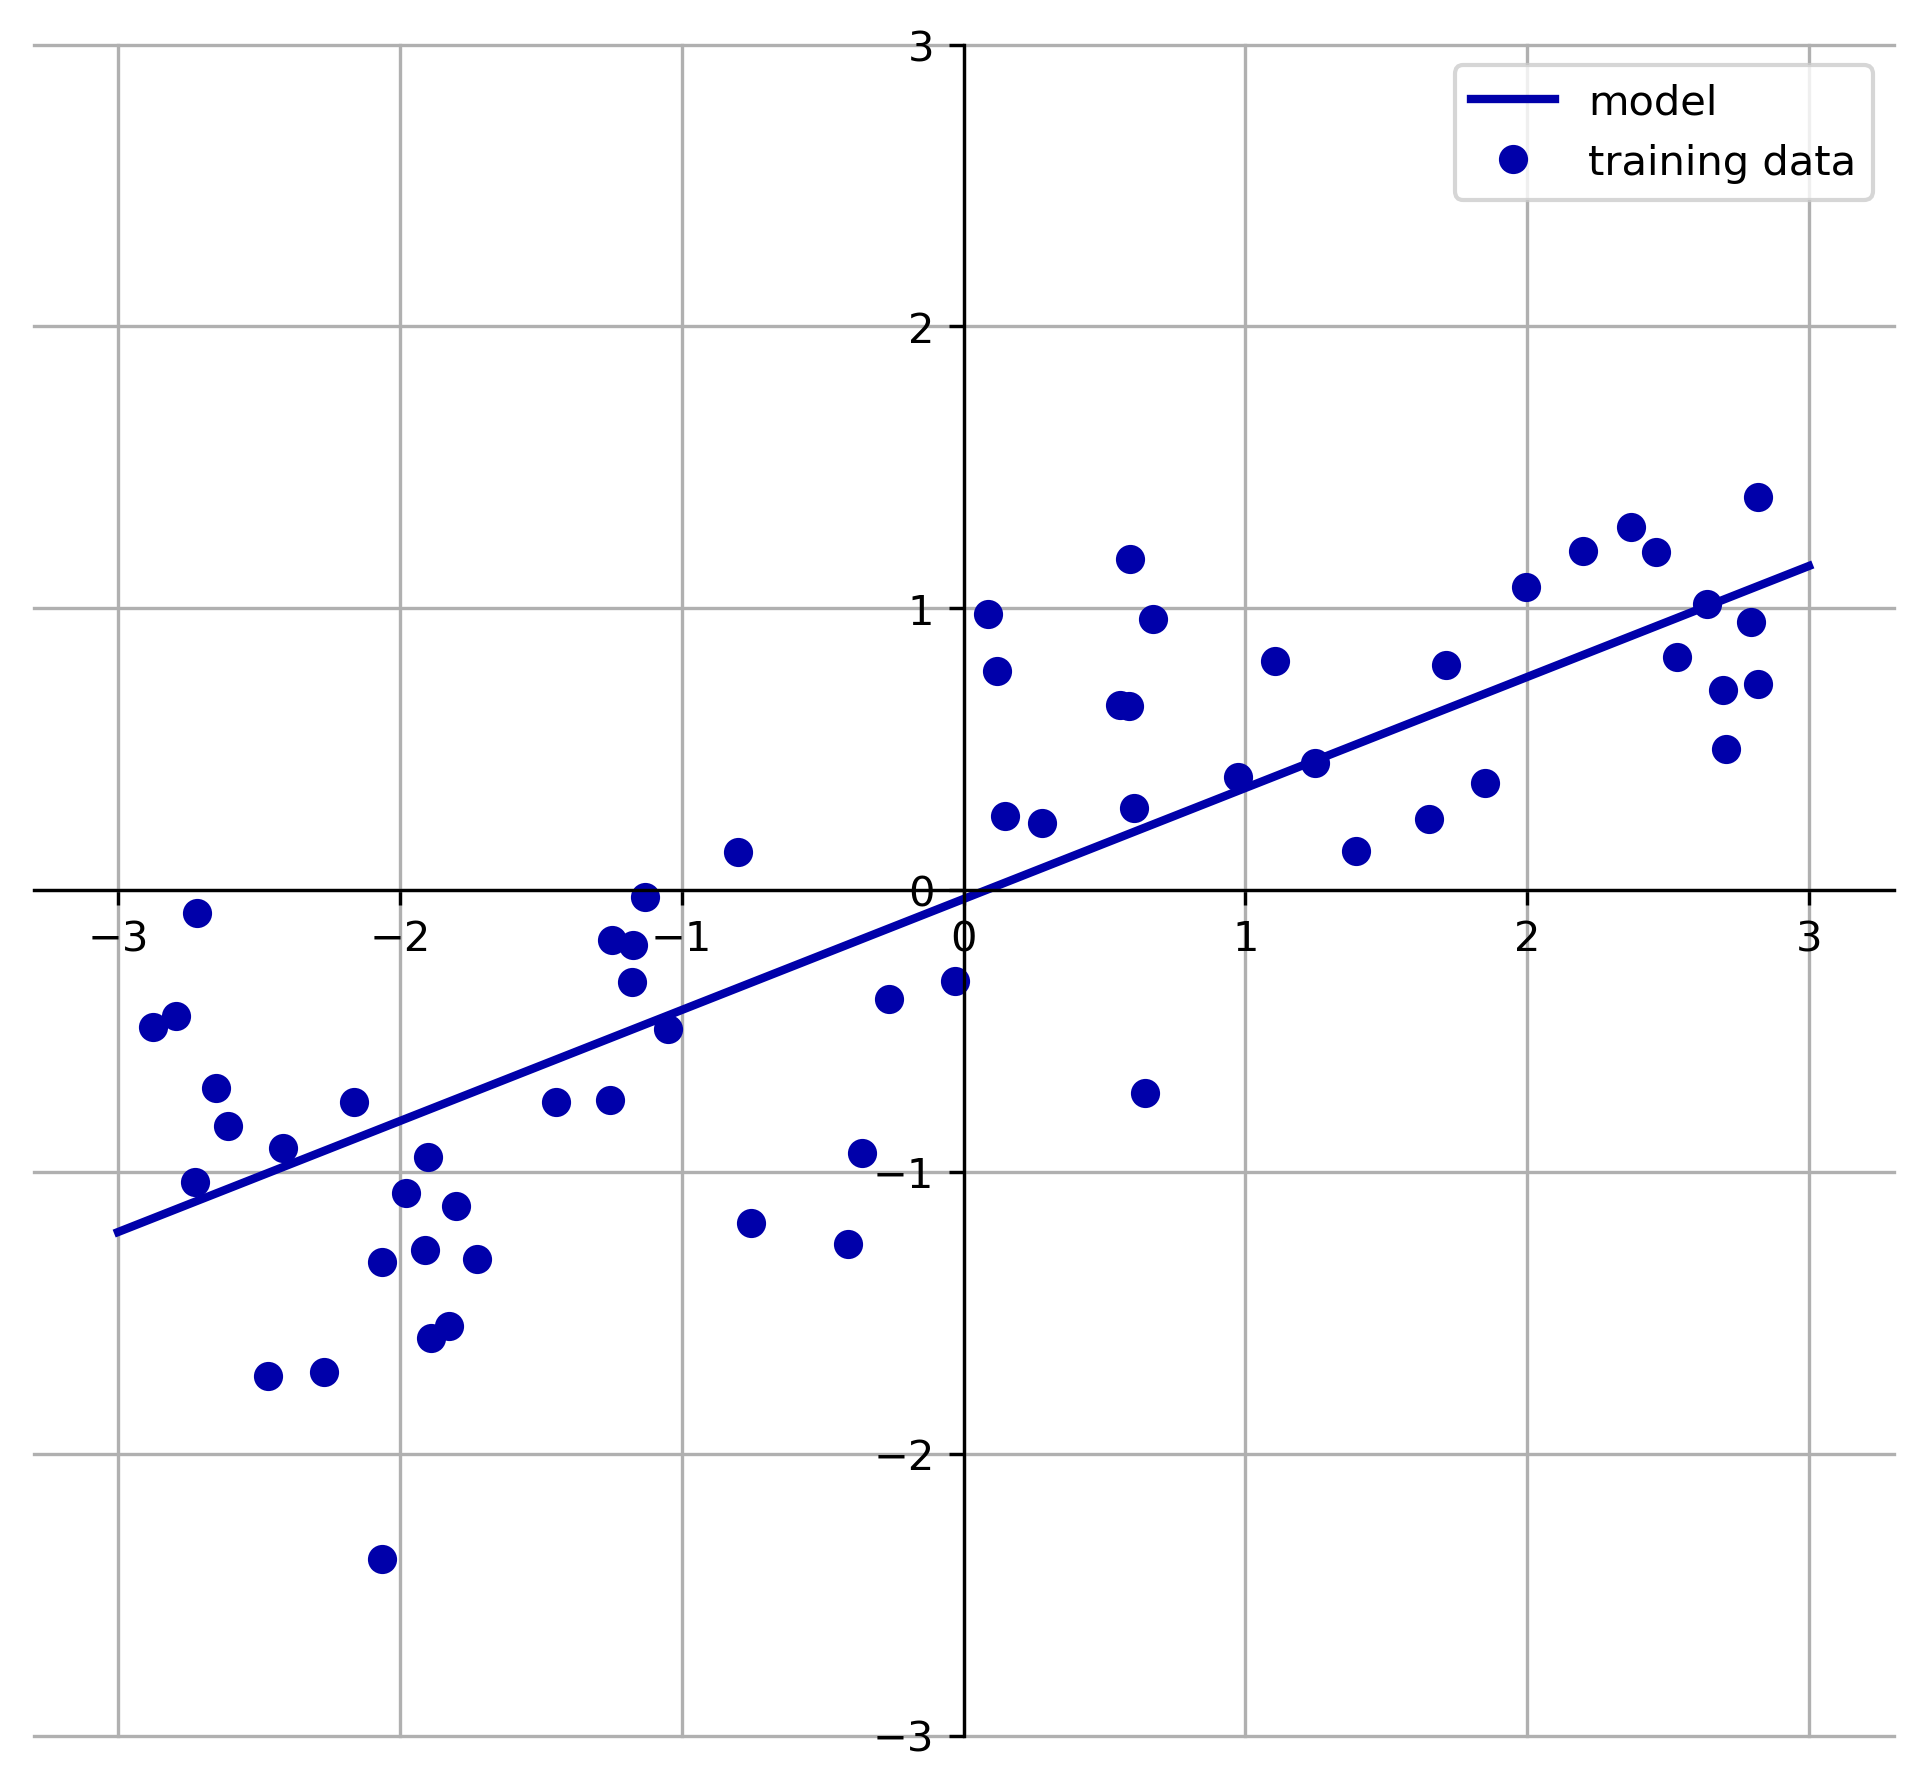

In [25]:
mglearn.plots.plot_linear_regression_wave()

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.394]
lr.intercept_: -0.031804343026759746


In [28]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 결과적으로 해당 데이터의 점수가 낮으므로 실제 훈련에는 별로임
- train 데이터에 적합하기 때문에 그러한 결과가 등장

### 릿지 회귀 (해결책)

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [31]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [32]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


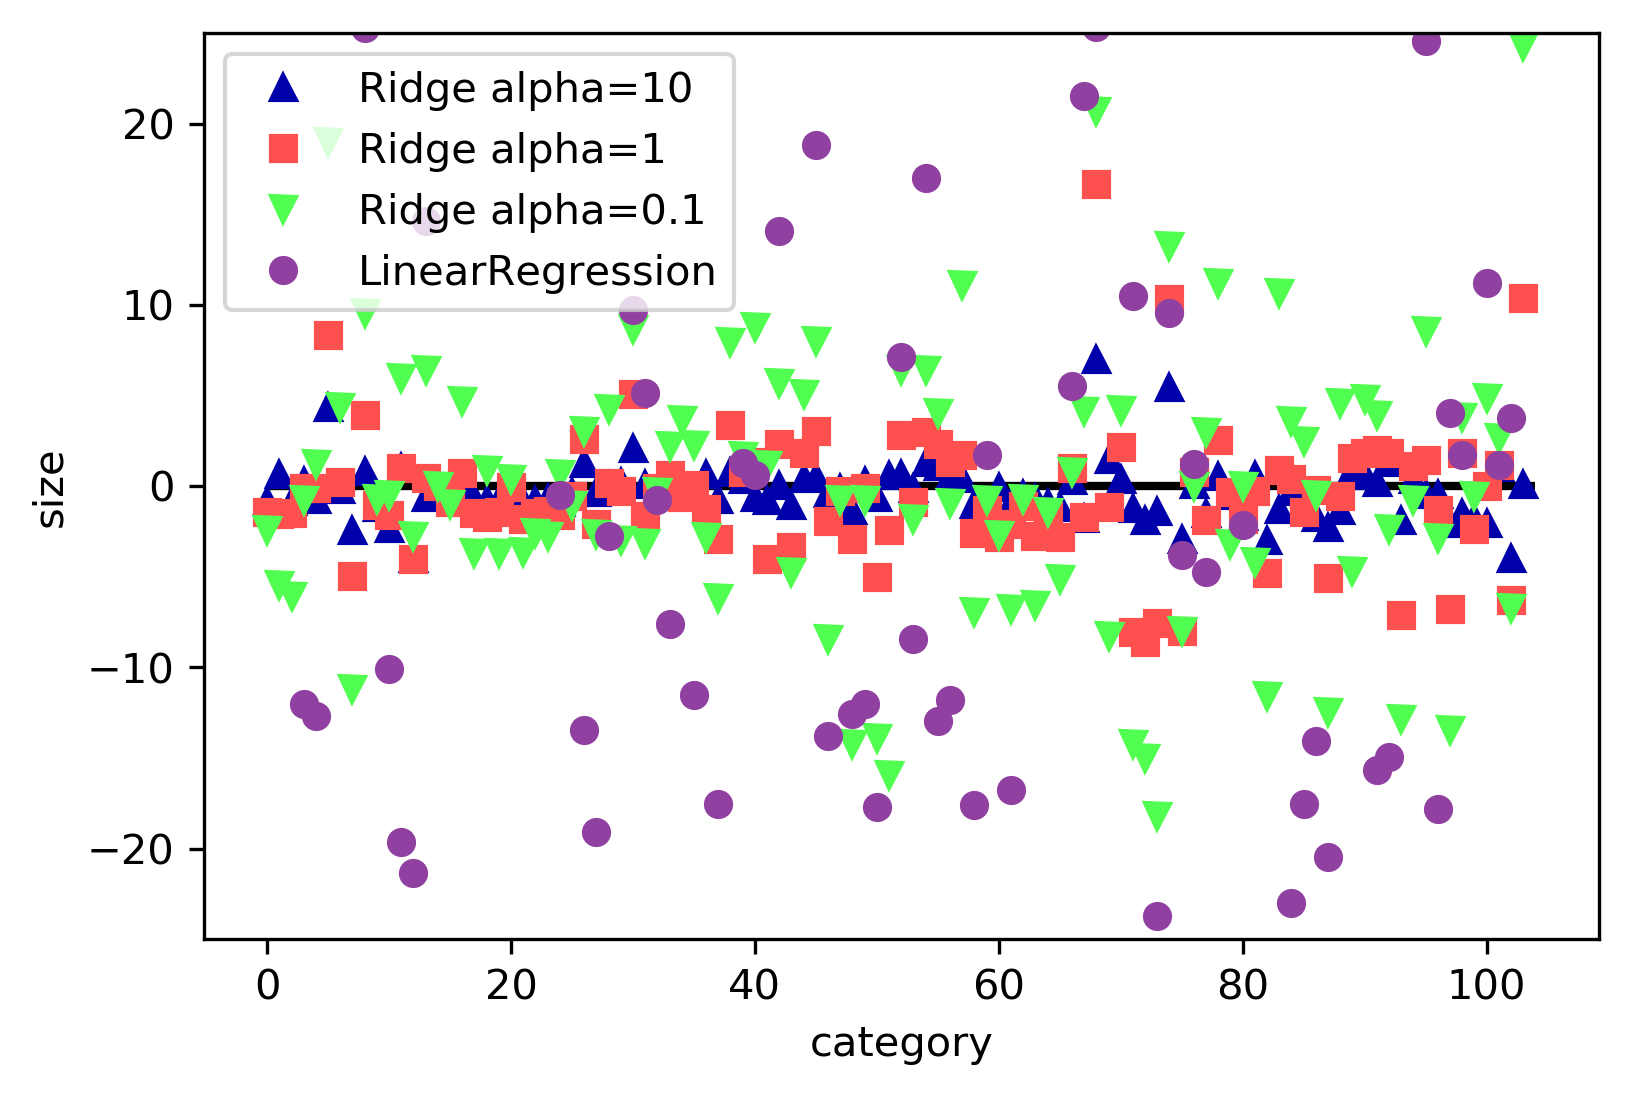

In [33]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("category")
plt.ylabel("size")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

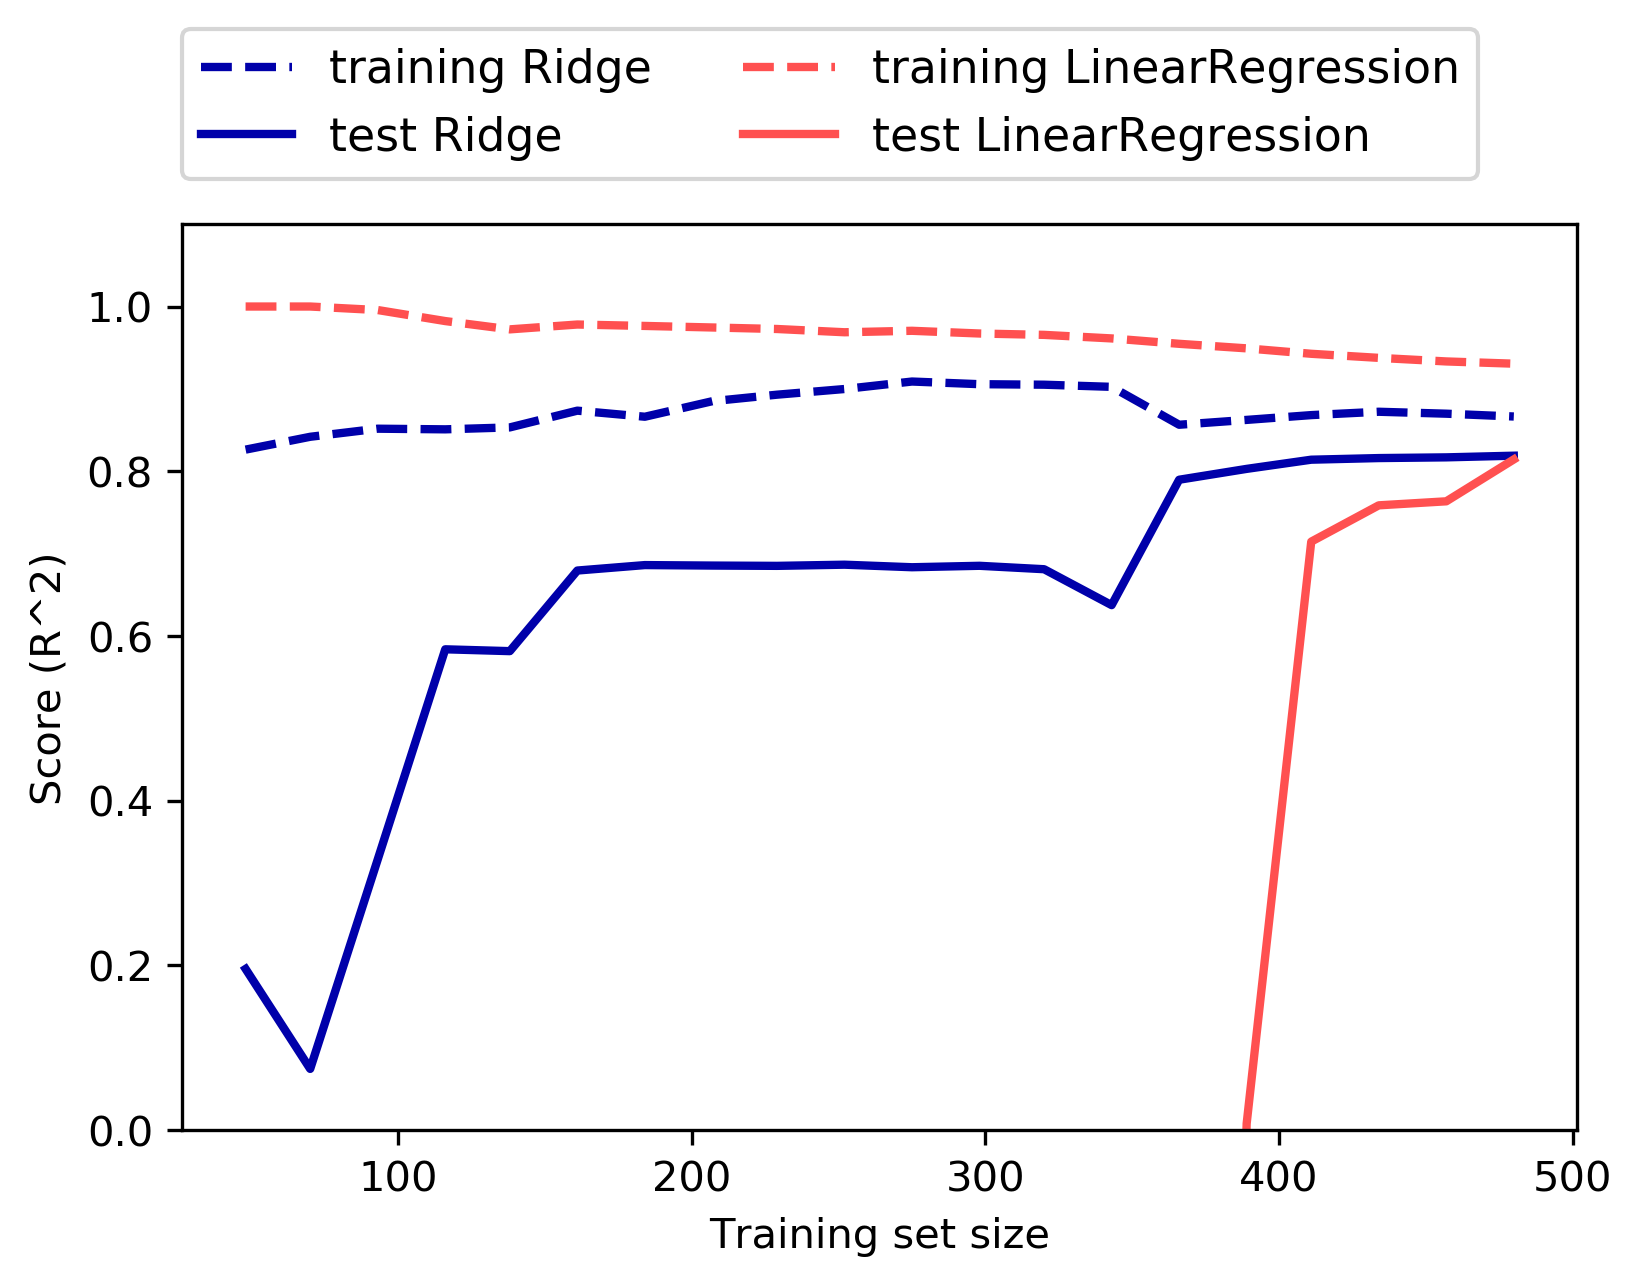

In [34]:
mglearn.plots.plot_ridge_n_samples()

### 라쏘 (p.82)
- L1 구제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 되기도 한다.
- 모델에서 완전히 제외되는 특성이 생성
- 특성 선택이 자동응로 이루어진다.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("train set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("number of using feature: {}".format(np.sum(lasso.coef_ != 0)))

train set score: 0.29
test set score: 0.21
number of using feature: 4


In [39]:
#alpha 값을 줄이면 max_iter 값을 증가
#max_iter 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고 발생
lasso001 = Lasso(alpha=0.01, max_iter=10).fit(X_train, y_train)

print("train set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of using feature: {}".format(np.sum(lasso001.coef_ != 0)))

train set score: 0.88
test set score: 0.75
number of using feature: 68


/Users/kyo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [40]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("train set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("number of using feature: {}".format(np.sum(lasso001.coef_ != 0)))

train set score: 0.90
test set score: 0.77
number of using feature: 33


- alpha 값을 낮추면 모델의 복잡도 증가
- 훈련 세트와 테스트 세트의 성능이 좋음
- Ridge 보다 조금 나음, 모델의 분석하기에도 좋음
    - alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합 발생

In [41]:
#alpha의 값을 낮춘 경우 위의 경우와 비교하여 훈련 점수는 좋아졌지만, test의 수치는 떨어지는 것을 확인
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("train set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("number of using feature: {}".format(np.sum(lasso00001.coef_ != 0)))

train set score: 0.95
test set score: 0.64
number of using feature: 94


Text(0,0.5,'coef size')

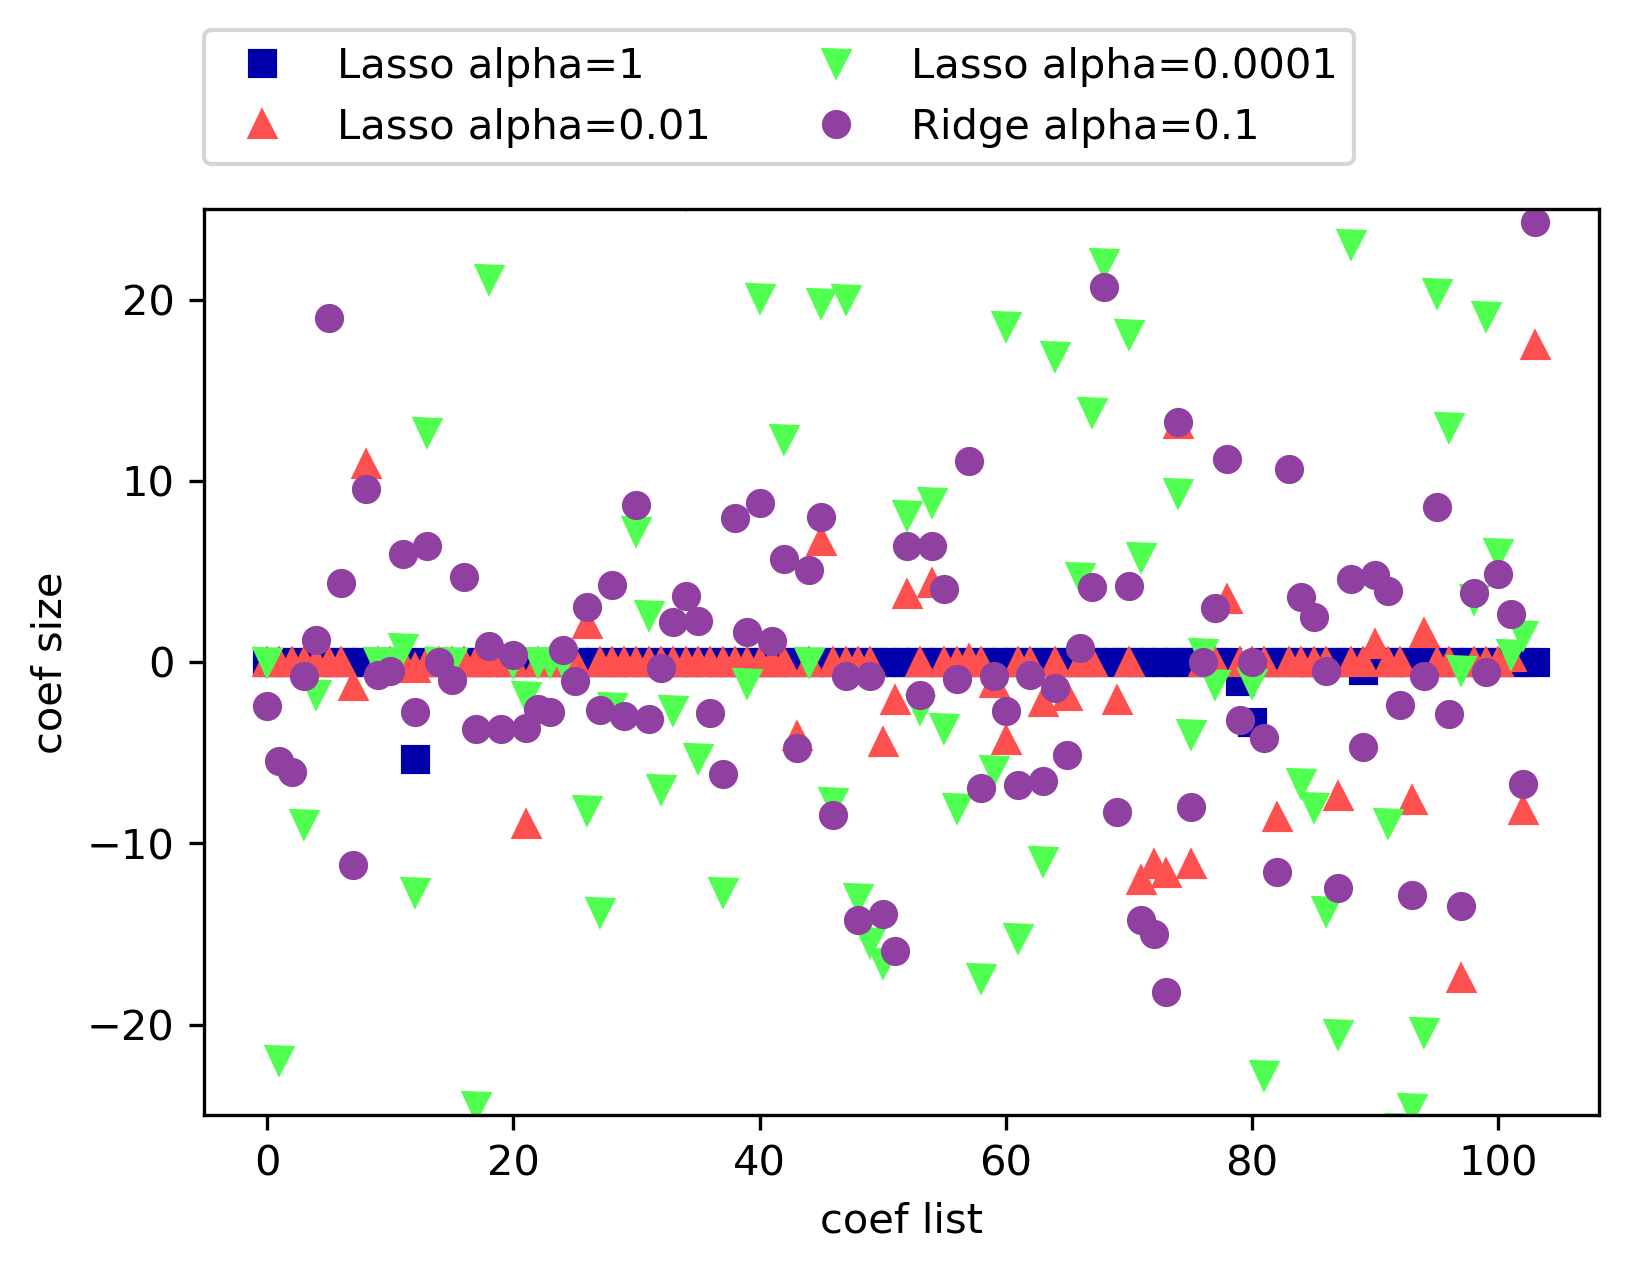

In [45]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef list")
plt.ylabel("coef size")

- alpha=1 일때 계수 대부분이 0이며, 나머지 계수들도 크기가 작음
- alpha의 계수의 값이 줄어들 수록 대부분의 특성이 0이 되는 분포를 얻음
- alpha의 값이 너무 작아지게 될 경우 대부분 0이 아닌 커지는 값이 되어 규제 받지 않은 모델을 얻음
- Lasso 0.1과 Ridge 0.01의 성능은 비슷, Ridge를 사용하는 어떤 계수도 0이 되지는 않음

### 분류용 선형 모델
1. 이진 분류
    - 선형 회귀와 비슷
    - 특성들의 가중치 합을 사용하는 대신, 예측한 값을 임계치 0과 비교
2. 선형 모델을 학습시키는 알고리즘은 다양, 두 방법으로 구분    
    - 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
    - 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

### Logistic Regression과 LinearSVC 모델

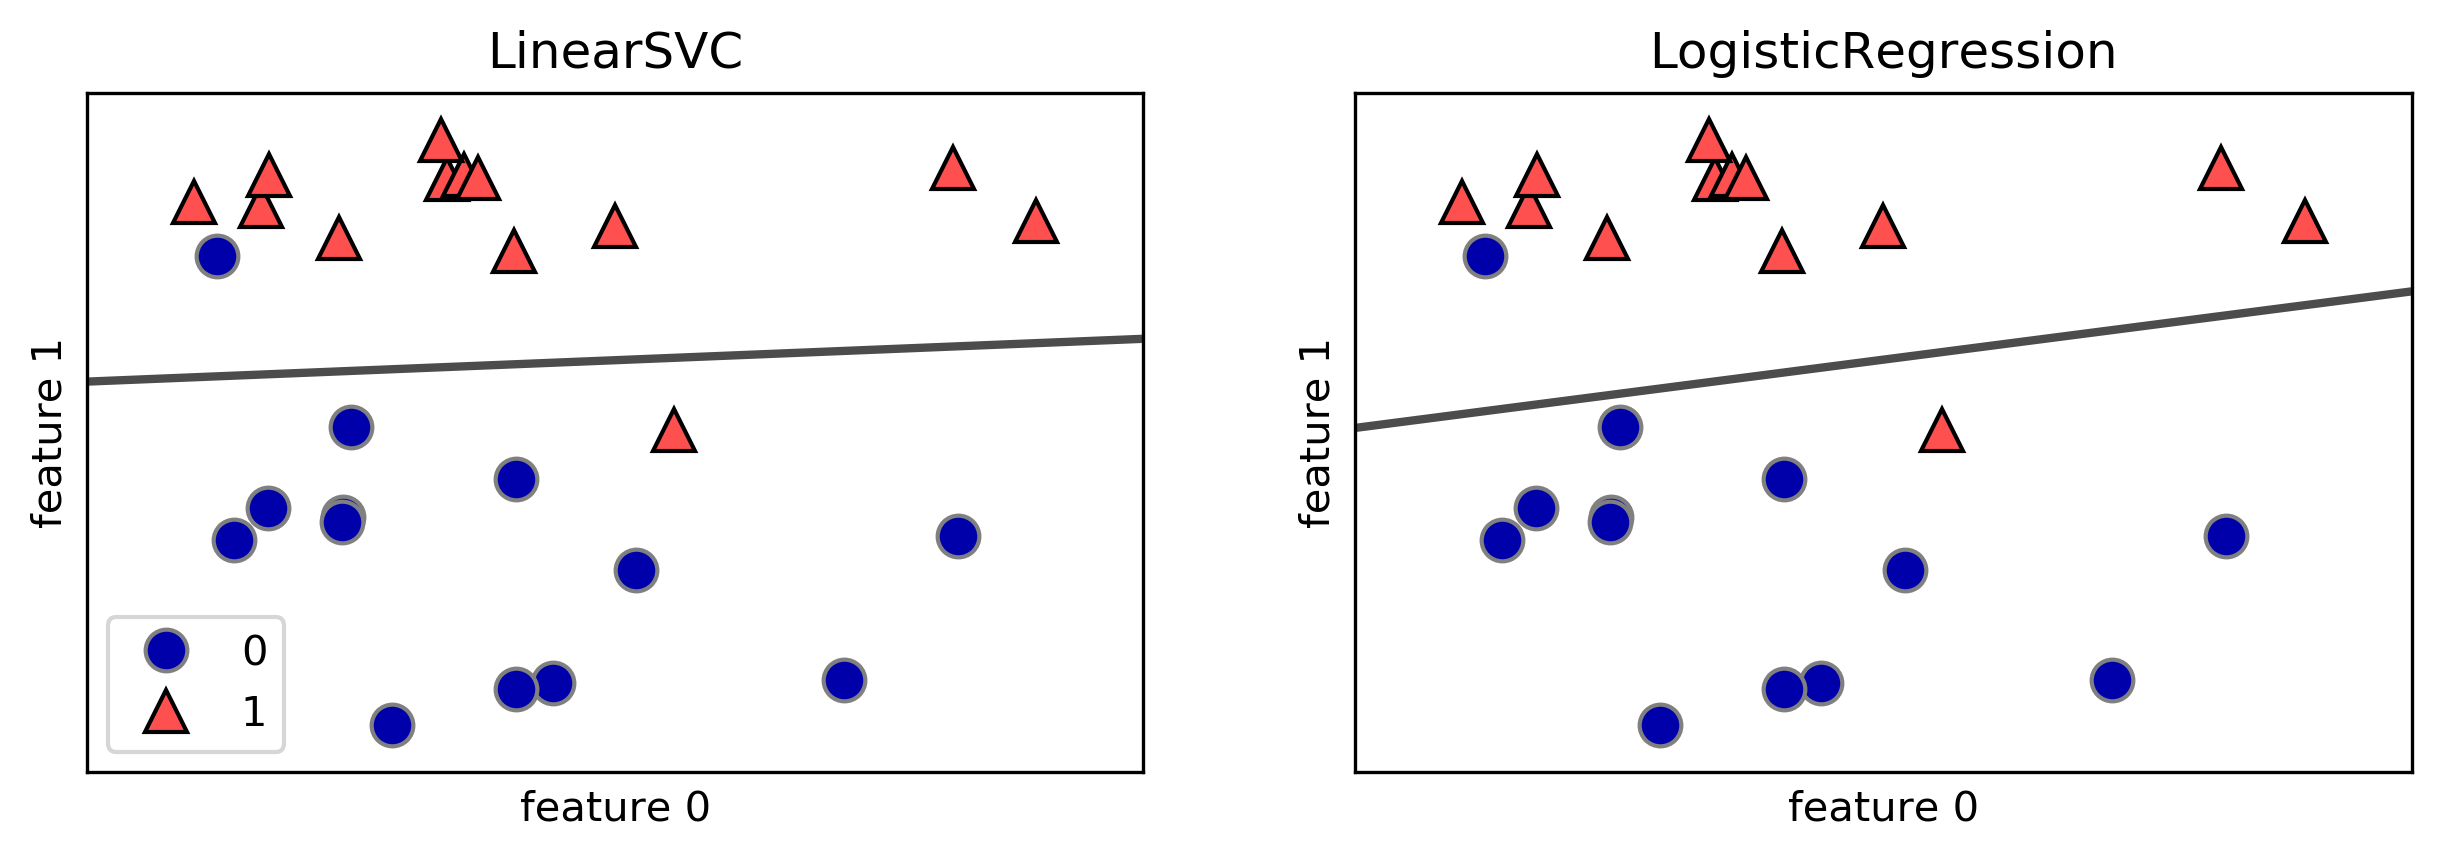

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

- LinearSVC, LogisticRegression 의 경계가 직선으로 표현
    - 위쪽 클래스 1, 아래쪽 클래스 0

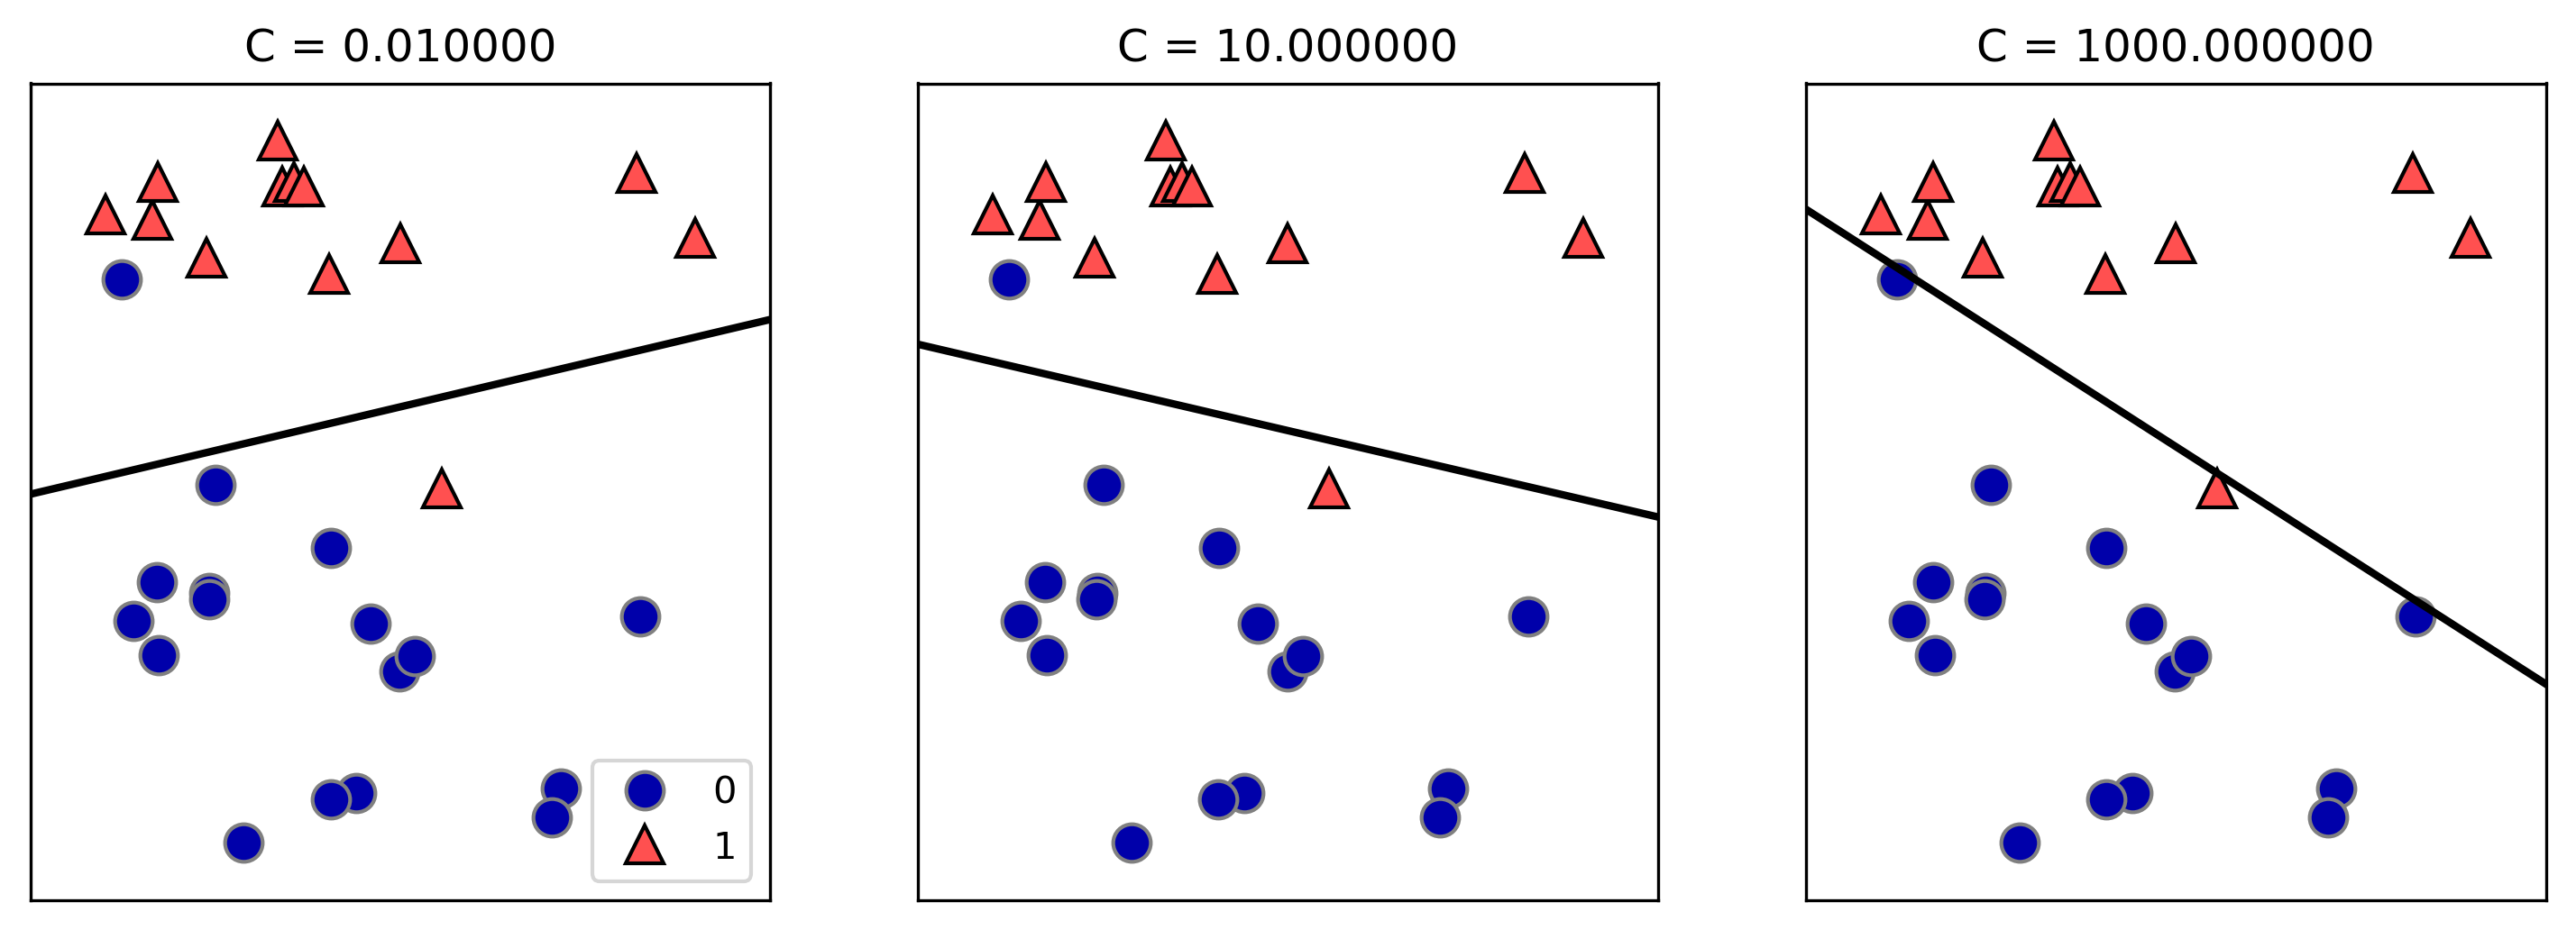

In [48]:
mglearn.plots.plot_linear_svc_regularization()

- C의 값을 크게 할 수록 올바른 분류 가능
    - 하지만 이는 과적합 된 것으로 보임

- 유방암 데이터셋을 활용한 LogisticRegression

In [50]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

#C=1 인 경우 훈련과 테스트 둘다 95% 정확도의 훌륭한 성능
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


In [51]:
#C=100 인 경우 정확도 더 증가
#복잡도가 높을수록 성능이 좋음
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.967
테스트 세트 점수: 0.965


In [53]:
#C=0,01 인 경우 정확도 감소
logreg001 = LogisticRegression(C=0.0001).fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.920
테스트 세트 점수: 0.923


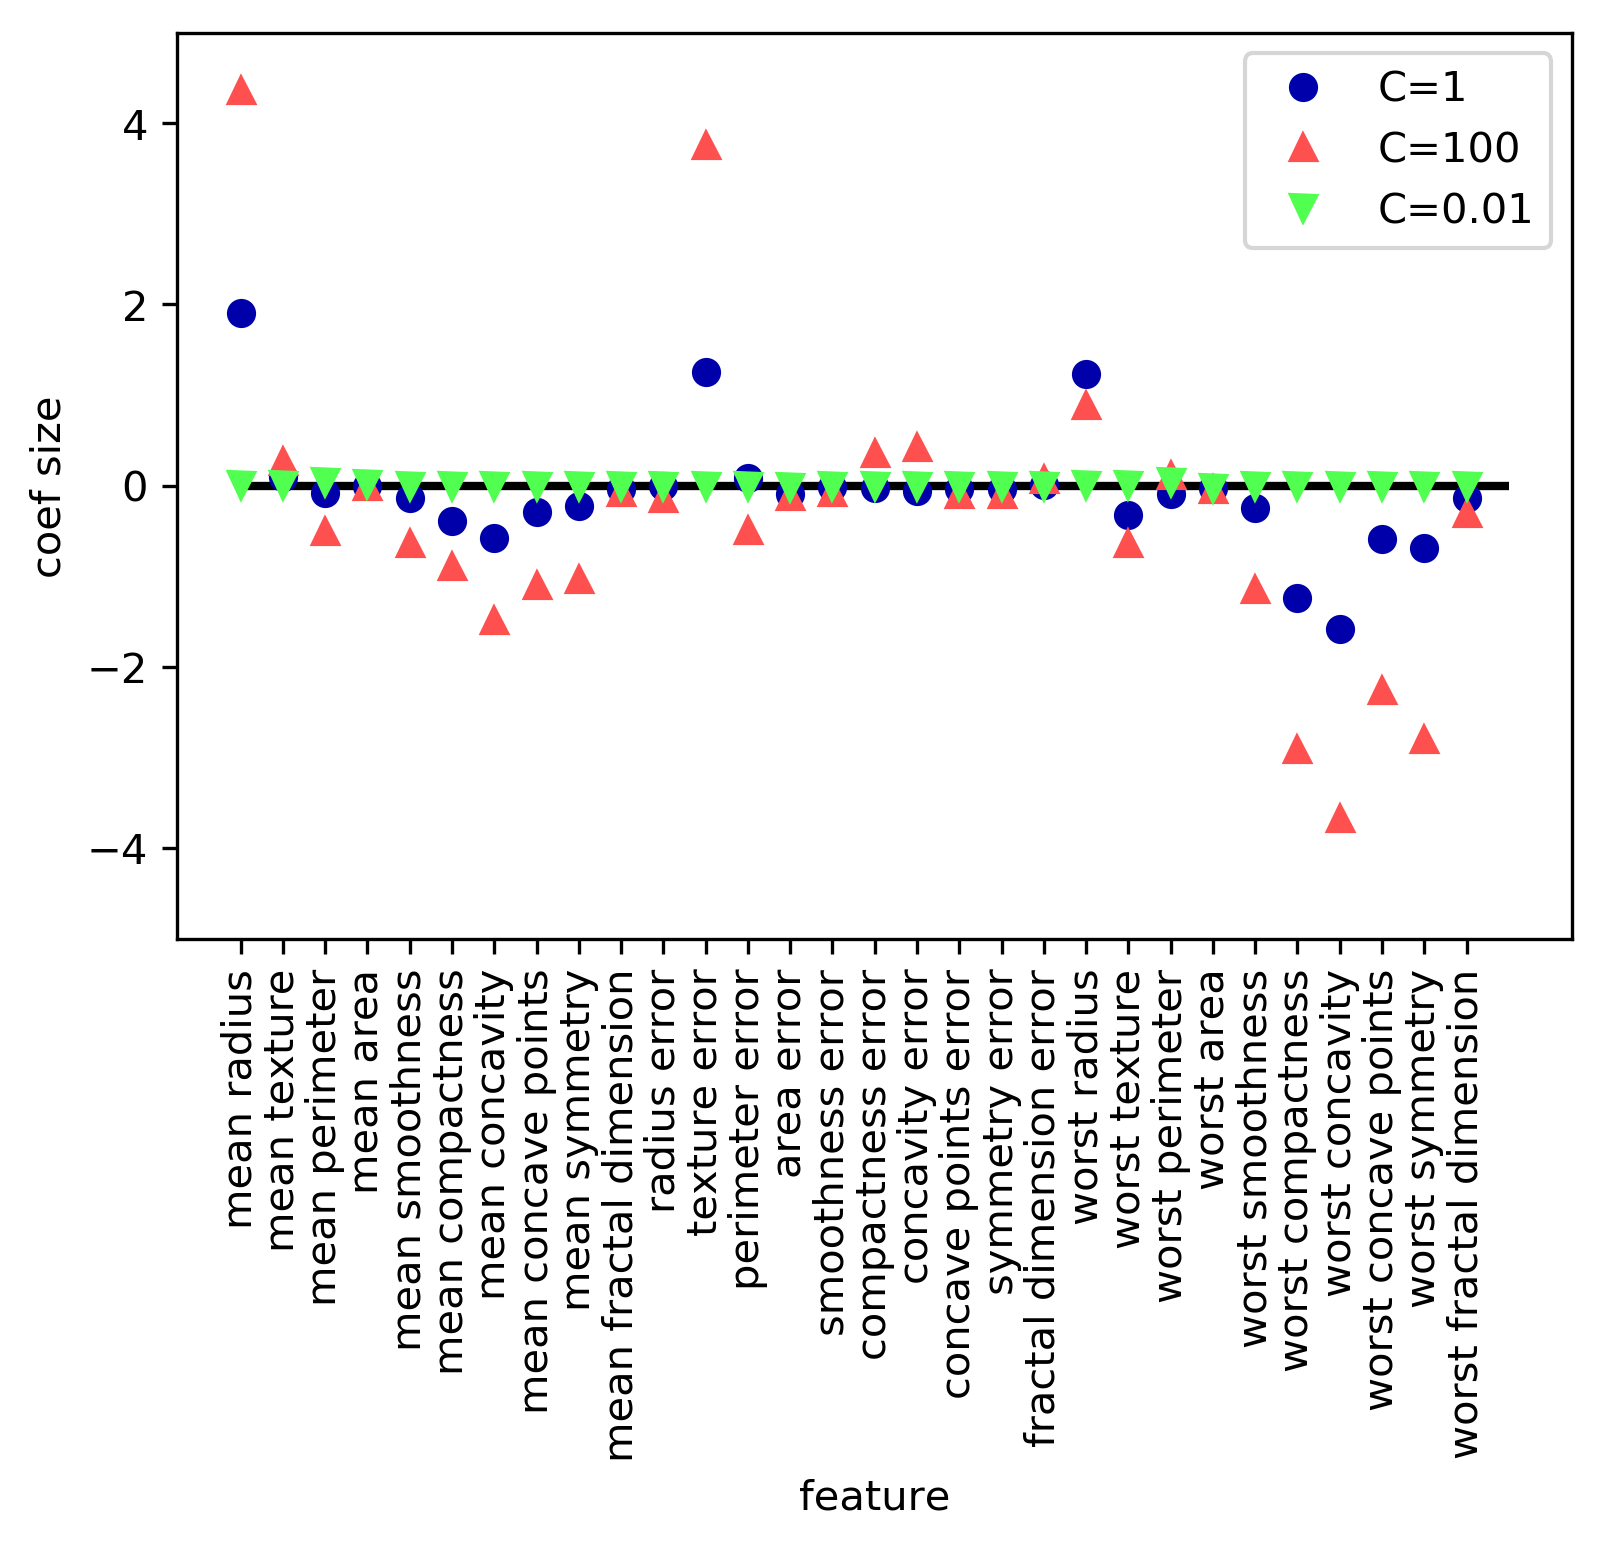

In [54]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


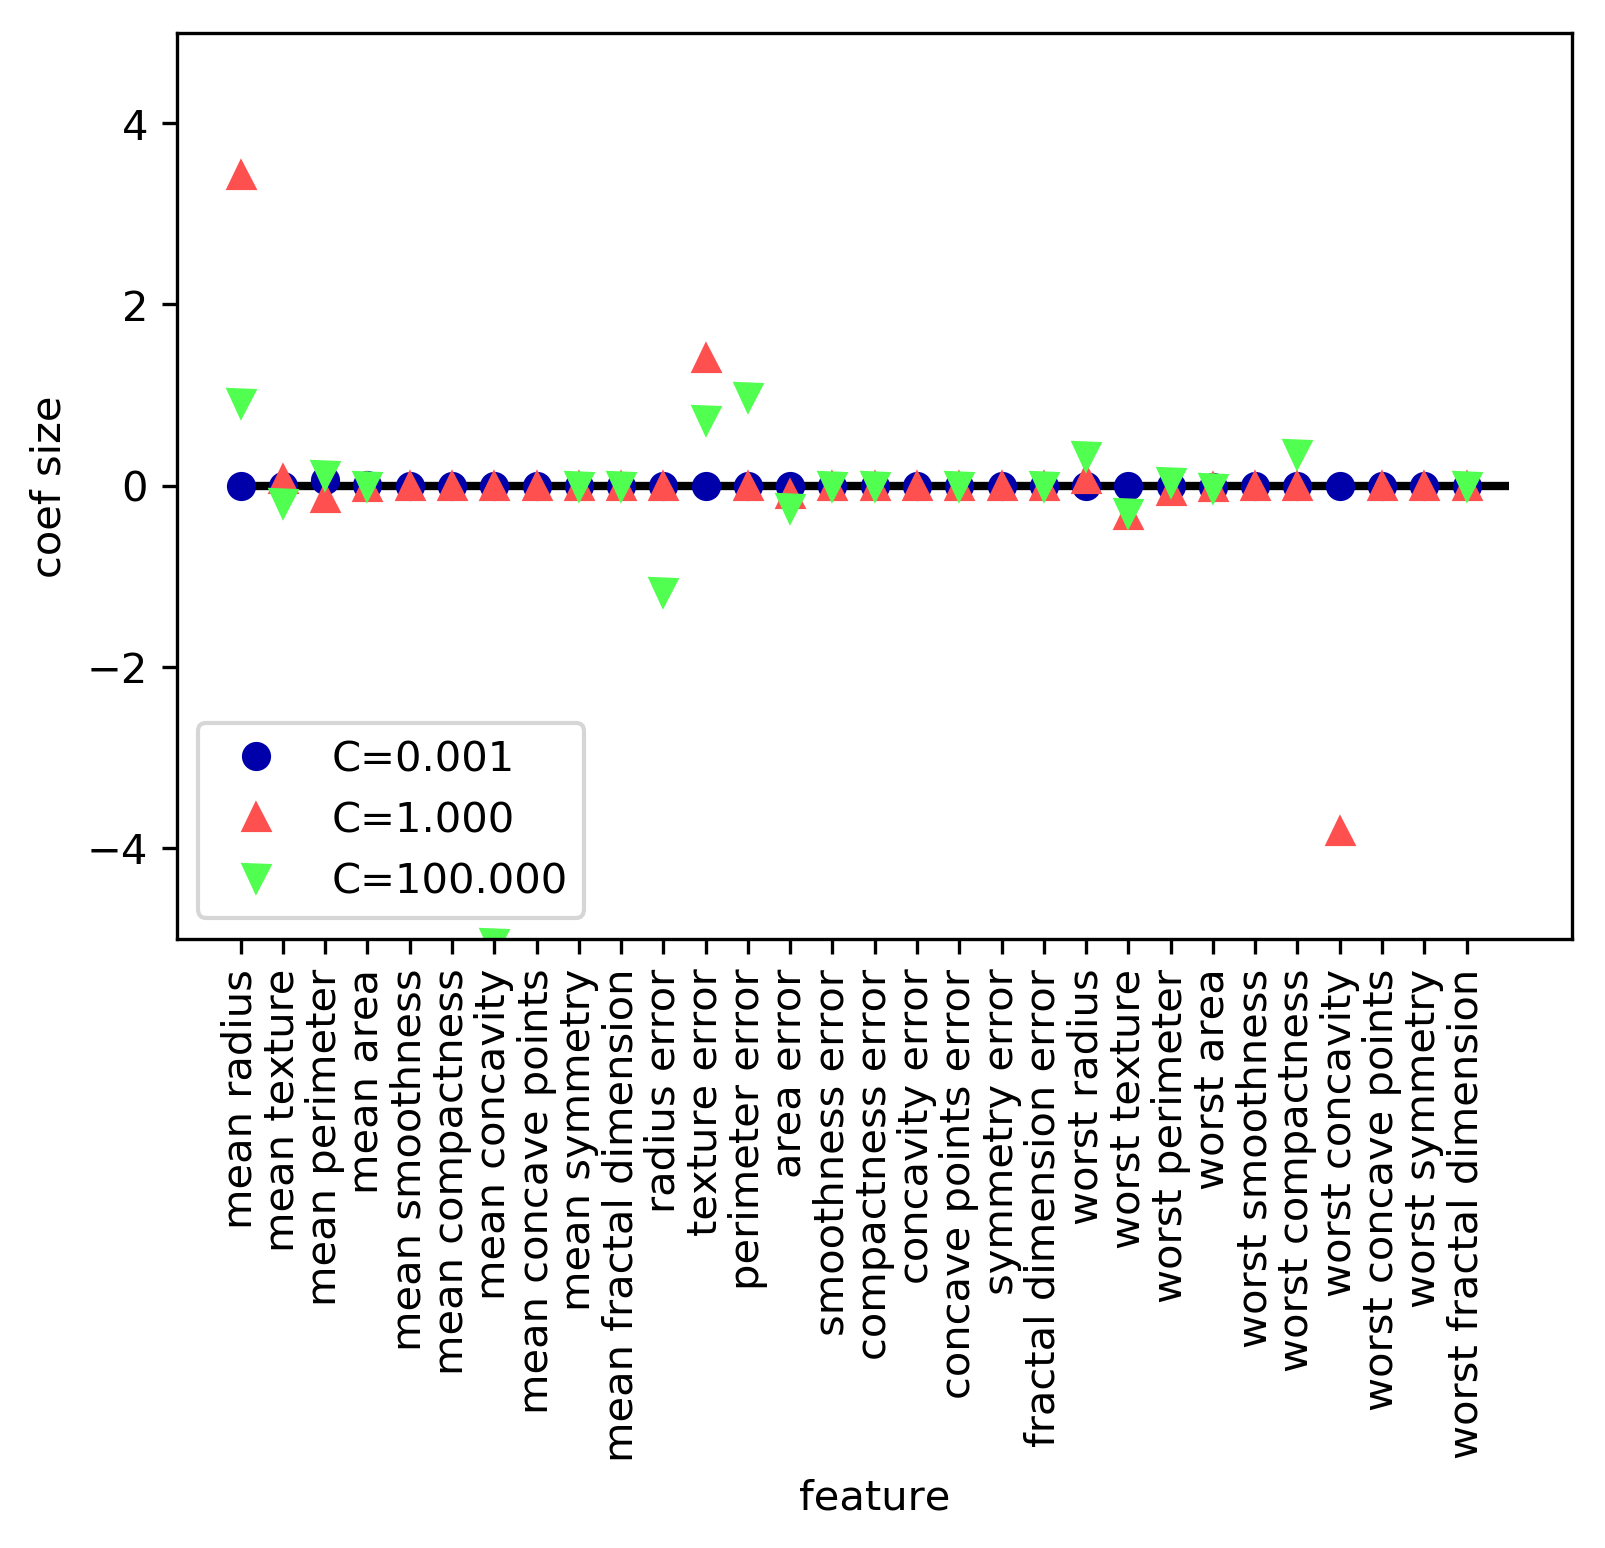

In [55]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3)

- 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 penalty 매개변수이다.

### 다중 클래스 분류용 선형 모델
- 선형 분류 모델은 이진 분류 만을 지원
- 일반적으로 일대다 방법을 사용

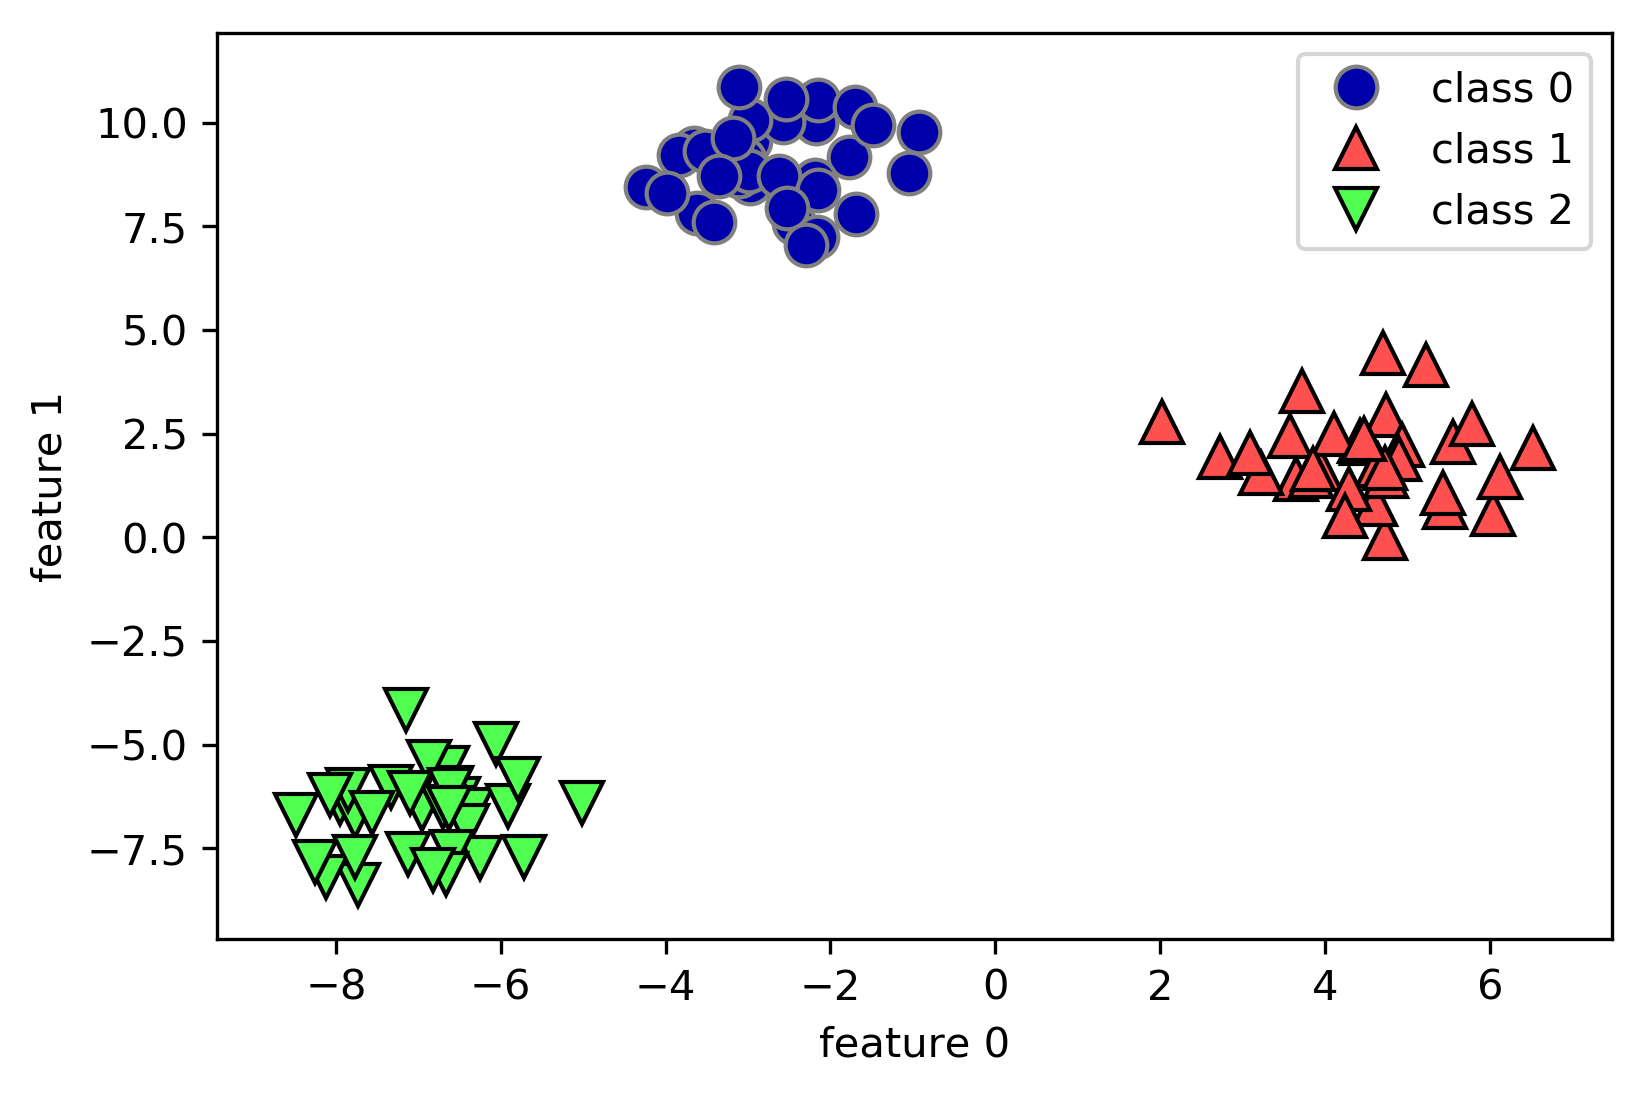

In [57]:
#make_blobs 데이터의 형태를 출력
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

- LinearSVC 분류기를 이용하여 훈련

In [58]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


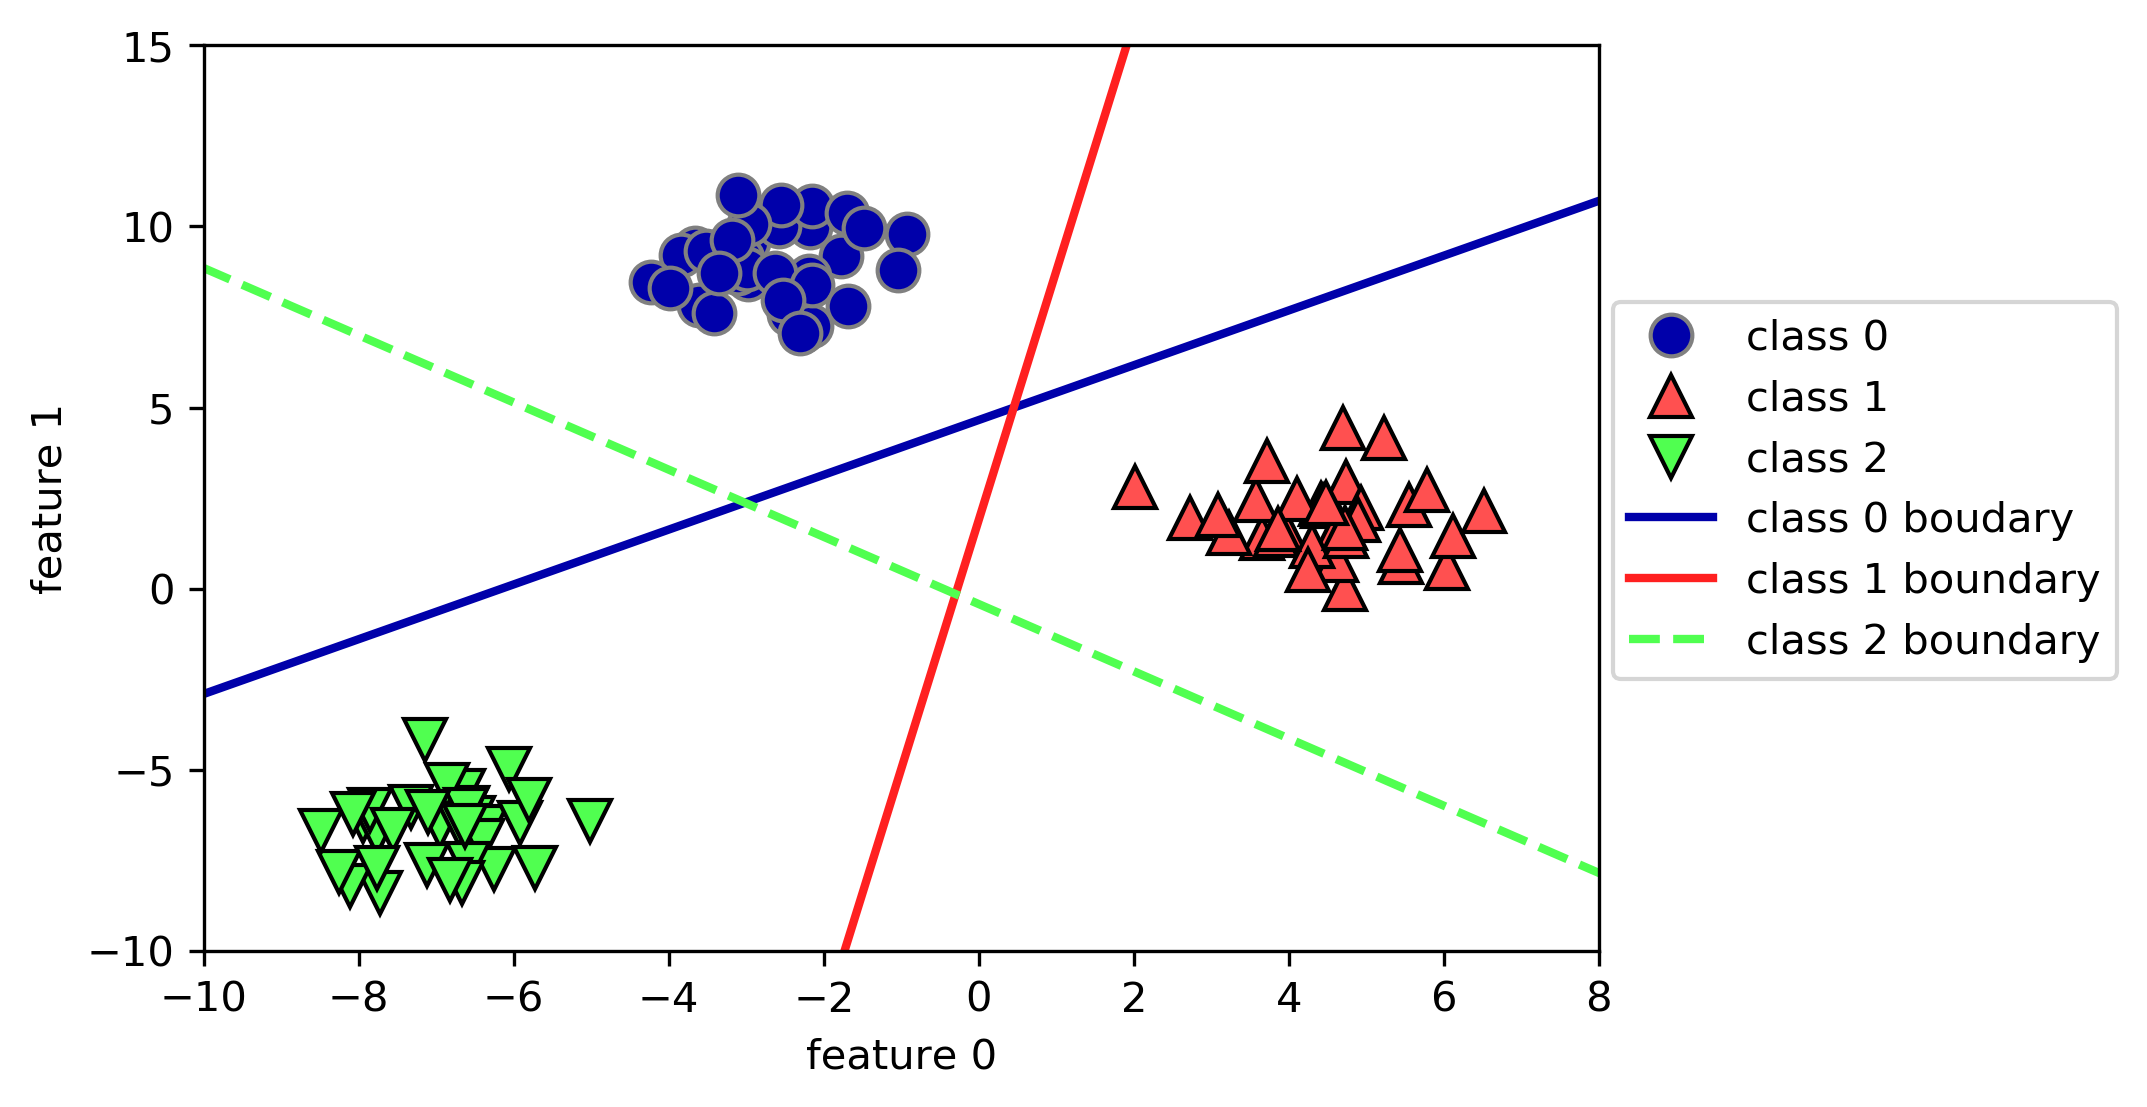

In [61]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boudary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))

- LinearSVC 를 사용할 경우 잘 분류는 되었으나, 가운데 삼각형에 새로운 데이터가 들어올 경우는?

Text(0,0.5,'feature 1')

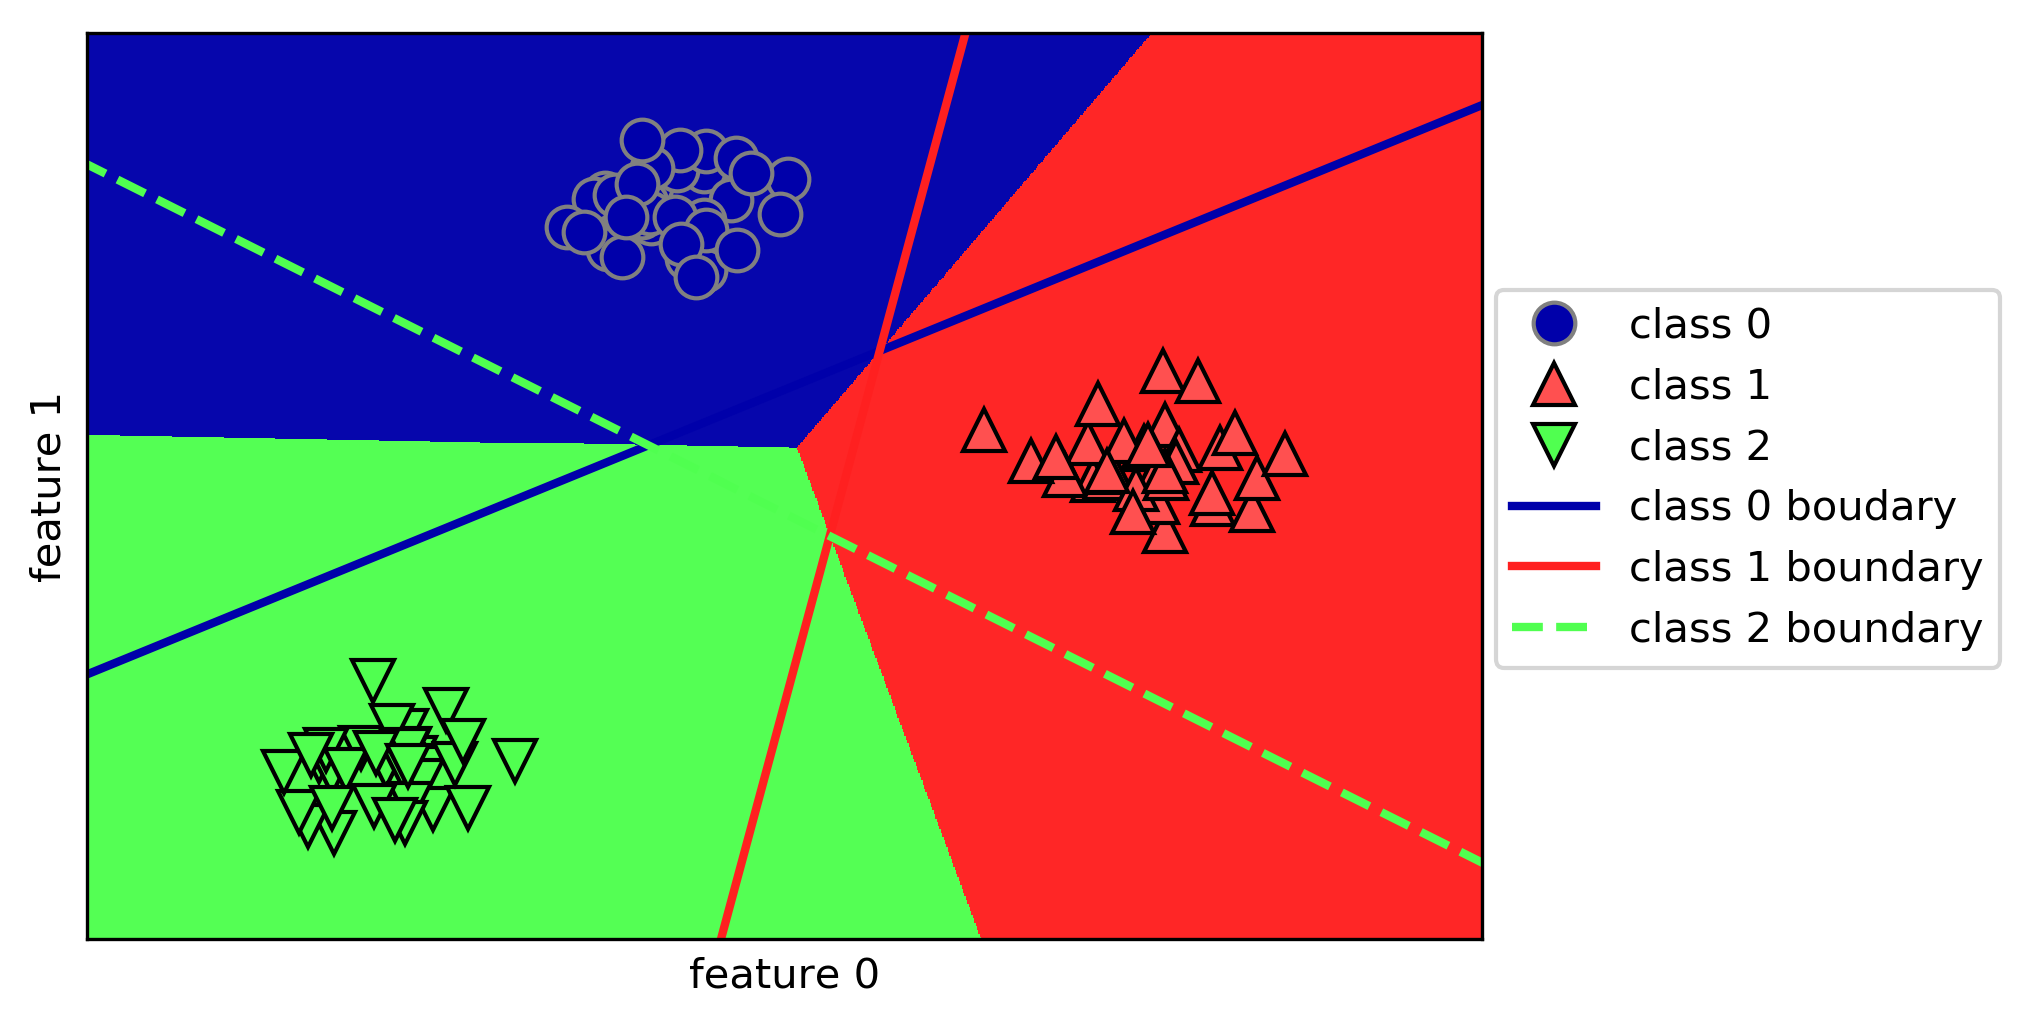

In [62]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boudary', 'class 1 boundary', 'class 2 boundary'], loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")

- 세개의 일대다 분류기가 ㅁ나든 다중클래스 결정 경계

### 장단점과 매개변수
- 선형 모델 학습은 속도가 빠르고 예측도 빠름
- 예측이 어떻게 만들어 지는지 비교가 쉬움

### 나이브 베이즈 분류기
- 선형 모델과 유사
- 훈련 속도가 빠름, 일반화 성능이 뒤짐
- 각 특성을 개별로 취급해 파라미터를 학습
    - 각 특성에서 클래스별 통계를 단순하게 취합

In [64]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0 ,1])

- 이진 특성을 가진 4개의 데이터 포인트
- 클래스는 0 과 1
- 출력 y는 클래스가 0인 경우 (첫버째와 세번째 데이터 포인트)
- 첫 번째 ㅌ

In [65]:
counts = {}
for label in np.unique(y):
    #클래스마다 반복
    #특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트\n{}".format(counts))

특성 카운트
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
